# Data Collection

In [12]:
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
import os

In [13]:
# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

## Create Test and Train data folders

In [14]:
outer_names = ['test','train']
inner_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

In [4]:
angry = 0
disgusted = 0
fearful = 0
happy = 0
sad = 0
surprised = 0
neutral = 0
angry_test = 0
disgusted_test = 0
fearful_test = 0
happy_test = 0
sad_test = 0
surprised_test = 0
neutral_test = 0

## Get Dataset

In [5]:
df = pd.read_csv('./fer2013.csv')
mat = np.zeros((48,48),dtype=np.uint8)
print("Saving images...")

Saving images...


In [ ]:
# read the csv file line by line
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()
    
    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i < 28709:
        if df['emotion'][i] == 0:
            img.save('train/angry/im'+str(angry)+'.png')
            angry += 1
        elif df['emotion'][i] == 1:
            img.save('train/disgusted/im'+str(disgusted)+'.png')
            disgusted += 1
        elif df['emotion'][i] == 2:
            img.save('train/fearful/im'+str(fearful)+'.png')
            fearful += 1
        elif df['emotion'][i] == 3:
            img.save('train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 4:
            img.save('train/sad/im'+str(sad)+'.png')
            sad += 1
        elif df['emotion'][i] == 5:
            img.save('train/surprised/im'+str(surprised)+'.png')
            surprised += 1
        elif df['emotion'][i] == 6:
            img.save('train/neutral/im'+str(neutral)+'.png')
            neutral += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save('test/angry/im'+str(angry_test)+'.png')
            angry_test += 1
        elif df['emotion'][i] == 1:
            img.save('test/disgusted/im'+str(disgusted_test)+'.png')
            disgusted_test += 1
        elif df['emotion'][i] == 2:
            img.save('test/fearful/im'+str(fearful_test)+'.png')
            fearful_test += 1
        elif df['emotion'][i] == 3:
            img.save('test/happy/im'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 4:
            img.save('test/sad/im'+str(sad_test)+'.png')
            sad_test += 1
        elif df['emotion'][i] == 5:
            img.save('test/surprised/im'+str(surprised_test)+'.png')
            surprised_test += 1
        elif df['emotion'][i] == 6:
            img.save('test/neutral/im'+str(neutral_test)+'.png')
            neutral_test += 1


# Create Model

In [15]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [16]:
# plots accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [17]:
# Define data generators
train_dir = 'data/train'
val_dir = 'data/test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [18]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

## Train and Save Model

In [11]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)
plot_model_history(model_info)
model.save_weights('model.h5')

Epoch 1/50


204/448 [============>.................] - ETA: 11:33 - loss: 1.9258 - acc: 0.25 - ETA: 7:07 - loss: 1.9330 - acc: 0.1719 - ETA: 5:37 - loss: 1.9271 - acc: 0.197 - ETA: 4:54 - loss: 1.9196 - acc: 0.210 - ETA: 4:27 - loss: 1.9163 - acc: 0.193 - ETA: 4:08 - loss: 1.9067 - acc: 0.184 - ETA: 3:52 - loss: 1.9002 - acc: 0.192 - ETA: 3:40 - loss: 1.8897 - acc: 0.191 - ETA: 3:32 - loss: 1.8885 - acc: 0.191 - ETA: 3:24 - loss: 1.8875 - acc: 0.185 - ETA: 3:18 - loss: 1.8858 - acc: 0.186 - ETA: 3:12 - loss: 1.8816 - acc: 0.191 - ETA: 3:08 - loss: 1.8759 - acc: 0.200 - ETA: 3:05 - loss: 1.8769 - acc: 0.204 - ETA: 3:01 - loss: 1.8769 - acc: 0.203 - ETA: 2:58 - loss: 1.8771 - acc: 0.205 - ETA: 2:55 - loss: 1.8740 - acc: 0.207 - ETA: 2:54 - loss: 1.8724 - acc: 0.208 - ETA: 2:52 - loss: 1.8715 - acc: 0.203 - ETA: 2:51 - loss: 1.8663 - acc: 0.207 - ETA: 2:50 - loss: 1.8599 - acc: 0.212 - ETA: 2:48 - loss: 1.8670 - acc: 0.212 - ETA: 2:47 - loss: 1.8631 - acc: 0.218 - ETA: 2:46 - loss: 1.8631 - acc: 0.21

415/448 [==========================>...] - ETA: 1:31 - loss: 1.8260 - acc: 0.243 - ETA: 1:30 - loss: 1.8260 - acc: 0.243 - ETA: 1:30 - loss: 1.8265 - acc: 0.243 - ETA: 1:29 - loss: 1.8262 - acc: 0.243 - ETA: 1:29 - loss: 1.8263 - acc: 0.243 - ETA: 1:29 - loss: 1.8264 - acc: 0.243 - ETA: 1:28 - loss: 1.8261 - acc: 0.243 - ETA: 1:28 - loss: 1.8261 - acc: 0.243 - ETA: 1:28 - loss: 1.8260 - acc: 0.243 - ETA: 1:27 - loss: 1.8257 - acc: 0.243 - ETA: 1:27 - loss: 1.8255 - acc: 0.243 - ETA: 1:27 - loss: 1.8256 - acc: 0.243 - ETA: 1:26 - loss: 1.8257 - acc: 0.243 - ETA: 1:26 - loss: 1.8258 - acc: 0.243 - ETA: 1:25 - loss: 1.8261 - acc: 0.243 - ETA: 1:25 - loss: 1.8260 - acc: 0.243 - ETA: 1:25 - loss: 1.8258 - acc: 0.243 - ETA: 1:24 - loss: 1.8258 - acc: 0.243 - ETA: 1:24 - loss: 1.8265 - acc: 0.243 - ETA: 1:24 - loss: 1.8268 - acc: 0.243 - ETA: 1:23 - loss: 1.8265 - acc: 0.243 - ETA: 1:23 - loss: 1.8268 - acc: 0.243 - ETA: 1:23 - loss: 1.8265 - acc: 0.244 - ETA: 1:22 - loss: 1.8263 - acc: 0.244

448/448 [==============================] - ETA: 11s - loss: 1.8065 - acc: 0.25 - ETA: 11s - loss: 1.8063 - acc: 0.25 - ETA: 11s - loss: 1.8063 - acc: 0.25 - ETA: 10s - loss: 1.8063 - acc: 0.25 - ETA: 10s - loss: 1.8063 - acc: 0.25 - ETA: 10s - loss: 1.8063 - acc: 0.25 - ETA: 9s - loss: 1.8059 - acc: 0.2567 - ETA: 9s - loss: 1.8057 - acc: 0.256 - ETA: 8s - loss: 1.8055 - acc: 0.257 - ETA: 8s - loss: 1.8051 - acc: 0.257 - ETA: 8s - loss: 1.8047 - acc: 0.257 - ETA: 7s - loss: 1.8044 - acc: 0.257 - ETA: 7s - loss: 1.8041 - acc: 0.258 - ETA: 7s - loss: 1.8035 - acc: 0.258 - ETA: 6s - loss: 1.8030 - acc: 0.258 - ETA: 6s - loss: 1.8029 - acc: 0.259 - ETA: 5s - loss: 1.8028 - acc: 0.259 - ETA: 5s - loss: 1.8025 - acc: 0.259 - ETA: 5s - loss: 1.8023 - acc: 0.259 - ETA: 4s - loss: 1.8022 - acc: 0.259 - ETA: 4s - loss: 1.8024 - acc: 0.259 - ETA: 4s - loss: 1.8021 - acc: 0.259 - ETA: 3s - loss: 1.8021 - acc: 0.259 - ETA: 3s - loss: 1.8019 - acc: 0.260 - ETA: 2s - loss: 1.8017 - acc: 0.260 - ETA: 2

204/448 [============>.................] - ETA: 2:59 - loss: 1.7768 - acc: 0.281 - ETA: 3:01 - loss: 1.7256 - acc: 0.328 - ETA: 3:00 - loss: 1.6965 - acc: 0.354 - ETA: 2:58 - loss: 1.6707 - acc: 0.355 - ETA: 2:56 - loss: 1.6941 - acc: 0.346 - ETA: 2:55 - loss: 1.6934 - acc: 0.338 - ETA: 2:52 - loss: 1.6905 - acc: 0.343 - ETA: 2:50 - loss: 1.7040 - acc: 0.343 - ETA: 2:49 - loss: 1.6973 - acc: 0.342 - ETA: 2:47 - loss: 1.7036 - acc: 0.329 - ETA: 2:46 - loss: 1.7045 - acc: 0.323 - ETA: 2:44 - loss: 1.7140 - acc: 0.333 - ETA: 2:43 - loss: 1.7202 - acc: 0.330 - ETA: 2:42 - loss: 1.7236 - acc: 0.325 - ETA: 2:43 - loss: 1.7323 - acc: 0.316 - ETA: 2:42 - loss: 1.7291 - acc: 0.317 - ETA: 2:41 - loss: 1.7248 - acc: 0.318 - ETA: 2:42 - loss: 1.7243 - acc: 0.324 - ETA: 2:41 - loss: 1.7165 - acc: 0.331 - ETA: 2:40 - loss: 1.7157 - acc: 0.332 - ETA: 2:40 - loss: 1.7187 - acc: 0.330 - ETA: 2:39 - loss: 1.7165 - acc: 0.330 - ETA: 2:39 - loss: 1.7178 - acc: 0.326 - ETA: 2:38 - loss: 1.7169 - acc: 0.325

414/448 [==========================>...] - ETA: 1:38 - loss: 1.6628 - acc: 0.351 - ETA: 1:38 - loss: 1.6631 - acc: 0.351 - ETA: 1:37 - loss: 1.6631 - acc: 0.350 - ETA: 1:37 - loss: 1.6630 - acc: 0.350 - ETA: 1:36 - loss: 1.6632 - acc: 0.350 - ETA: 1:36 - loss: 1.6626 - acc: 0.351 - ETA: 1:36 - loss: 1.6625 - acc: 0.351 - ETA: 1:35 - loss: 1.6615 - acc: 0.352 - ETA: 1:35 - loss: 1.6622 - acc: 0.351 - ETA: 1:35 - loss: 1.6623 - acc: 0.351 - ETA: 1:34 - loss: 1.6624 - acc: 0.351 - ETA: 1:34 - loss: 1.6615 - acc: 0.352 - ETA: 1:34 - loss: 1.6619 - acc: 0.352 - ETA: 1:33 - loss: 1.6622 - acc: 0.351 - ETA: 1:33 - loss: 1.6626 - acc: 0.351 - ETA: 1:33 - loss: 1.6613 - acc: 0.352 - ETA: 1:32 - loss: 1.6612 - acc: 0.352 - ETA: 1:32 - loss: 1.6609 - acc: 0.352 - ETA: 1:31 - loss: 1.6611 - acc: 0.352 - ETA: 1:31 - loss: 1.6616 - acc: 0.352 - ETA: 1:31 - loss: 1.6608 - acc: 0.352 - ETA: 1:30 - loss: 1.6604 - acc: 0.353 - ETA: 1:30 - loss: 1.6606 - acc: 0.353 - ETA: 1:29 - loss: 1.6607 - acc: 0.353

448/448 [==============================] - ETA: 13s - loss: 1.6373 - acc: 0.36 - ETA: 13s - loss: 1.6370 - acc: 0.36 - ETA: 12s - loss: 1.6369 - acc: 0.36 - ETA: 12s - loss: 1.6364 - acc: 0.36 - ETA: 11s - loss: 1.6360 - acc: 0.36 - ETA: 11s - loss: 1.6358 - acc: 0.36 - ETA: 10s - loss: 1.6357 - acc: 0.36 - ETA: 10s - loss: 1.6355 - acc: 0.36 - ETA: 10s - loss: 1.6355 - acc: 0.36 - ETA: 9s - loss: 1.6353 - acc: 0.3652 - ETA: 9s - loss: 1.6353 - acc: 0.365 - ETA: 8s - loss: 1.6356 - acc: 0.365 - ETA: 8s - loss: 1.6354 - acc: 0.365 - ETA: 8s - loss: 1.6354 - acc: 0.364 - ETA: 7s - loss: 1.6352 - acc: 0.364 - ETA: 7s - loss: 1.6352 - acc: 0.365 - ETA: 6s - loss: 1.6352 - acc: 0.365 - ETA: 6s - loss: 1.6350 - acc: 0.365 - ETA: 6s - loss: 1.6351 - acc: 0.364 - ETA: 5s - loss: 1.6348 - acc: 0.365 - ETA: 5s - loss: 1.6347 - acc: 0.365 - ETA: 4s - loss: 1.6343 - acc: 0.365 - ETA: 4s - loss: 1.6340 - acc: 0.365 - ETA: 4s - loss: 1.6341 - acc: 0.365 - ETA: 3s - loss: 1.6343 - acc: 0.365 - ETA: 3

204/448 [============>.................] - ETA: 2:59 - loss: 1.6260 - acc: 0.390 - ETA: 2:58 - loss: 1.6083 - acc: 0.343 - ETA: 3:00 - loss: 1.6339 - acc: 0.349 - ETA: 3:06 - loss: 1.5526 - acc: 0.398 - ETA: 3:02 - loss: 1.5559 - acc: 0.387 - ETA: 3:00 - loss: 1.5751 - acc: 0.377 - ETA: 2:57 - loss: 1.5675 - acc: 0.381 - ETA: 2:56 - loss: 1.5482 - acc: 0.386 - ETA: 2:58 - loss: 1.5582 - acc: 0.381 - ETA: 2:57 - loss: 1.5442 - acc: 0.396 - ETA: 2:55 - loss: 1.5468 - acc: 0.399 - ETA: 2:53 - loss: 1.5532 - acc: 0.391 - ETA: 2:52 - loss: 1.5460 - acc: 0.399 - ETA: 2:51 - loss: 1.5486 - acc: 0.399 - ETA: 2:50 - loss: 1.5485 - acc: 0.397 - ETA: 2:50 - loss: 1.5508 - acc: 0.396 - ETA: 2:49 - loss: 1.5547 - acc: 0.393 - ETA: 2:47 - loss: 1.5560 - acc: 0.394 - ETA: 2:47 - loss: 1.5542 - acc: 0.399 - ETA: 2:47 - loss: 1.5511 - acc: 0.399 - ETA: 2:46 - loss: 1.5566 - acc: 0.395 - ETA: 2:46 - loss: 1.5578 - acc: 0.392 - ETA: 2:45 - loss: 1.5600 - acc: 0.389 - ETA: 2:44 - loss: 1.5600 - acc: 0.391

414/448 [==========================>...] - ETA: 1:33 - loss: 1.5545 - acc: 0.398 - ETA: 1:32 - loss: 1.5535 - acc: 0.399 - ETA: 1:32 - loss: 1.5532 - acc: 0.399 - ETA: 1:32 - loss: 1.5528 - acc: 0.399 - ETA: 1:31 - loss: 1.5541 - acc: 0.398 - ETA: 1:31 - loss: 1.5548 - acc: 0.398 - ETA: 1:31 - loss: 1.5549 - acc: 0.398 - ETA: 1:30 - loss: 1.5538 - acc: 0.398 - ETA: 1:30 - loss: 1.5534 - acc: 0.399 - ETA: 1:29 - loss: 1.5540 - acc: 0.398 - ETA: 1:29 - loss: 1.5547 - acc: 0.398 - ETA: 1:29 - loss: 1.5552 - acc: 0.398 - ETA: 1:28 - loss: 1.5544 - acc: 0.398 - ETA: 1:28 - loss: 1.5534 - acc: 0.398 - ETA: 1:28 - loss: 1.5540 - acc: 0.398 - ETA: 1:27 - loss: 1.5538 - acc: 0.398 - ETA: 1:27 - loss: 1.5536 - acc: 0.398 - ETA: 1:27 - loss: 1.5533 - acc: 0.399 - ETA: 1:26 - loss: 1.5537 - acc: 0.398 - ETA: 1:26 - loss: 1.5539 - acc: 0.399 - ETA: 1:26 - loss: 1.5539 - acc: 0.399 - ETA: 1:25 - loss: 1.5543 - acc: 0.398 - ETA: 1:25 - loss: 1.5537 - acc: 0.398 - ETA: 1:25 - loss: 1.5539 - acc: 0.398

448/448 [==============================] - ETA: 12s - loss: 1.5377 - acc: 0.40 - ETA: 12s - loss: 1.5371 - acc: 0.40 - ETA: 12s - loss: 1.5369 - acc: 0.40 - ETA: 11s - loss: 1.5366 - acc: 0.40 - ETA: 11s - loss: 1.5362 - acc: 0.40 - ETA: 10s - loss: 1.5364 - acc: 0.40 - ETA: 10s - loss: 1.5366 - acc: 0.40 - ETA: 10s - loss: 1.5366 - acc: 0.40 - ETA: 9s - loss: 1.5366 - acc: 0.4096 - ETA: 9s - loss: 1.5364 - acc: 0.409 - ETA: 8s - loss: 1.5364 - acc: 0.410 - ETA: 8s - loss: 1.5366 - acc: 0.409 - ETA: 8s - loss: 1.5364 - acc: 0.409 - ETA: 7s - loss: 1.5361 - acc: 0.409 - ETA: 7s - loss: 1.5361 - acc: 0.410 - ETA: 6s - loss: 1.5358 - acc: 0.410 - ETA: 6s - loss: 1.5351 - acc: 0.410 - ETA: 6s - loss: 1.5355 - acc: 0.410 - ETA: 5s - loss: 1.5355 - acc: 0.410 - ETA: 5s - loss: 1.5352 - acc: 0.410 - ETA: 5s - loss: 1.5350 - acc: 0.410 - ETA: 4s - loss: 1.5349 - acc: 0.410 - ETA: 4s - loss: 1.5348 - acc: 0.410 - ETA: 3s - loss: 1.5349 - acc: 0.410 - ETA: 3s - loss: 1.5350 - acc: 0.410 - ETA: 3

204/448 [============>.................] - ETA: 2:52 - loss: 1.4124 - acc: 0.500 - ETA: 2:51 - loss: 1.4755 - acc: 0.429 - ETA: 2:52 - loss: 1.5102 - acc: 0.432 - ETA: 3:03 - loss: 1.4749 - acc: 0.460 - ETA: 3:02 - loss: 1.4657 - acc: 0.453 - ETA: 2:59 - loss: 1.4557 - acc: 0.466 - ETA: 2:55 - loss: 1.4767 - acc: 0.453 - ETA: 2:52 - loss: 1.4822 - acc: 0.443 - ETA: 2:50 - loss: 1.4650 - acc: 0.458 - ETA: 2:48 - loss: 1.4655 - acc: 0.454 - ETA: 2:46 - loss: 1.4545 - acc: 0.457 - ETA: 2:45 - loss: 1.4606 - acc: 0.451 - ETA: 2:43 - loss: 1.4554 - acc: 0.454 - ETA: 2:42 - loss: 1.4491 - acc: 0.456 - ETA: 2:41 - loss: 1.4537 - acc: 0.456 - ETA: 2:41 - loss: 1.4555 - acc: 0.458 - ETA: 2:41 - loss: 1.4550 - acc: 0.455 - ETA: 2:42 - loss: 1.4530 - acc: 0.454 - ETA: 2:42 - loss: 1.4578 - acc: 0.450 - ETA: 2:43 - loss: 1.4542 - acc: 0.451 - ETA: 2:44 - loss: 1.4591 - acc: 0.450 - ETA: 2:44 - loss: 1.4546 - acc: 0.449 - ETA: 2:45 - loss: 1.4538 - acc: 0.449 - ETA: 2:45 - loss: 1.4631 - acc: 0.447

414/448 [==========================>...] - ETA: 1:37 - loss: 1.4760 - acc: 0.436 - ETA: 1:37 - loss: 1.4763 - acc: 0.436 - ETA: 1:36 - loss: 1.4763 - acc: 0.436 - ETA: 1:36 - loss: 1.4757 - acc: 0.436 - ETA: 1:36 - loss: 1.4758 - acc: 0.437 - ETA: 1:35 - loss: 1.4761 - acc: 0.437 - ETA: 1:35 - loss: 1.4762 - acc: 0.436 - ETA: 1:34 - loss: 1.4757 - acc: 0.437 - ETA: 1:34 - loss: 1.4763 - acc: 0.436 - ETA: 1:34 - loss: 1.4760 - acc: 0.436 - ETA: 1:33 - loss: 1.4750 - acc: 0.437 - ETA: 1:33 - loss: 1.4746 - acc: 0.437 - ETA: 1:33 - loss: 1.4747 - acc: 0.437 - ETA: 1:32 - loss: 1.4756 - acc: 0.437 - ETA: 1:32 - loss: 1.4748 - acc: 0.437 - ETA: 1:31 - loss: 1.4749 - acc: 0.437 - ETA: 1:31 - loss: 1.4743 - acc: 0.438 - ETA: 1:31 - loss: 1.4745 - acc: 0.438 - ETA: 1:30 - loss: 1.4752 - acc: 0.437 - ETA: 1:30 - loss: 1.4745 - acc: 0.438 - ETA: 1:29 - loss: 1.4748 - acc: 0.438 - ETA: 1:29 - loss: 1.4749 - acc: 0.438 - ETA: 1:29 - loss: 1.4750 - acc: 0.438 - ETA: 1:28 - loss: 1.4745 - acc: 0.438

448/448 [==============================] - ETA: 12s - loss: 1.4621 - acc: 0.44 - ETA: 12s - loss: 1.4622 - acc: 0.44 - ETA: 12s - loss: 1.4622 - acc: 0.44 - ETA: 11s - loss: 1.4621 - acc: 0.44 - ETA: 11s - loss: 1.4615 - acc: 0.44 - ETA: 10s - loss: 1.4621 - acc: 0.44 - ETA: 10s - loss: 1.4619 - acc: 0.44 - ETA: 10s - loss: 1.4618 - acc: 0.44 - ETA: 9s - loss: 1.4618 - acc: 0.4440 - ETA: 9s - loss: 1.4618 - acc: 0.443 - ETA: 9s - loss: 1.4614 - acc: 0.444 - ETA: 8s - loss: 1.4611 - acc: 0.444 - ETA: 8s - loss: 1.4610 - acc: 0.444 - ETA: 7s - loss: 1.4607 - acc: 0.444 - ETA: 7s - loss: 1.4610 - acc: 0.444 - ETA: 7s - loss: 1.4610 - acc: 0.444 - ETA: 6s - loss: 1.4604 - acc: 0.444 - ETA: 6s - loss: 1.4605 - acc: 0.444 - ETA: 5s - loss: 1.4600 - acc: 0.444 - ETA: 5s - loss: 1.4599 - acc: 0.444 - ETA: 5s - loss: 1.4601 - acc: 0.444 - ETA: 4s - loss: 1.4598 - acc: 0.445 - ETA: 4s - loss: 1.4599 - acc: 0.445 - ETA: 3s - loss: 1.4596 - acc: 0.445 - ETA: 3s - loss: 1.4597 - acc: 0.445 - ETA: 3

204/448 [============>.................] - ETA: 2:55 - loss: 1.3669 - acc: 0.500 - ETA: 2:46 - loss: 1.3702 - acc: 0.492 - ETA: 2:45 - loss: 1.3570 - acc: 0.474 - ETA: 2:53 - loss: 1.4072 - acc: 0.464 - ETA: 2:56 - loss: 1.4019 - acc: 0.462 - ETA: 2:55 - loss: 1.4368 - acc: 0.442 - ETA: 2:54 - loss: 1.4339 - acc: 0.444 - ETA: 2:52 - loss: 1.4272 - acc: 0.443 - ETA: 2:51 - loss: 1.4154 - acc: 0.447 - ETA: 2:49 - loss: 1.4132 - acc: 0.448 - ETA: 2:47 - loss: 1.4156 - acc: 0.451 - ETA: 2:45 - loss: 1.4177 - acc: 0.447 - ETA: 2:44 - loss: 1.4174 - acc: 0.448 - ETA: 2:45 - loss: 1.4154 - acc: 0.446 - ETA: 2:45 - loss: 1.4257 - acc: 0.440 - ETA: 2:44 - loss: 1.4250 - acc: 0.447 - ETA: 2:43 - loss: 1.4193 - acc: 0.444 - ETA: 2:42 - loss: 1.4246 - acc: 0.442 - ETA: 2:41 - loss: 1.4138 - acc: 0.451 - ETA: 2:40 - loss: 1.4065 - acc: 0.454 - ETA: 2:40 - loss: 1.4014 - acc: 0.456 - ETA: 2:40 - loss: 1.4090 - acc: 0.456 - ETA: 2:40 - loss: 1.4194 - acc: 0.454 - ETA: 2:40 - loss: 1.4237 - acc: 0.453

414/448 [==========================>...] - ETA: 1:33 - loss: 1.3966 - acc: 0.470 - ETA: 1:32 - loss: 1.3967 - acc: 0.470 - ETA: 1:32 - loss: 1.3966 - acc: 0.470 - ETA: 1:32 - loss: 1.3963 - acc: 0.470 - ETA: 1:31 - loss: 1.3965 - acc: 0.470 - ETA: 1:31 - loss: 1.3964 - acc: 0.470 - ETA: 1:31 - loss: 1.3958 - acc: 0.470 - ETA: 1:30 - loss: 1.3955 - acc: 0.470 - ETA: 1:30 - loss: 1.3956 - acc: 0.470 - ETA: 1:29 - loss: 1.3956 - acc: 0.470 - ETA: 1:29 - loss: 1.3959 - acc: 0.470 - ETA: 1:29 - loss: 1.3956 - acc: 0.470 - ETA: 1:28 - loss: 1.3949 - acc: 0.471 - ETA: 1:28 - loss: 1.3948 - acc: 0.470 - ETA: 1:27 - loss: 1.3941 - acc: 0.471 - ETA: 1:27 - loss: 1.3949 - acc: 0.470 - ETA: 1:27 - loss: 1.3952 - acc: 0.471 - ETA: 1:26 - loss: 1.3956 - acc: 0.470 - ETA: 1:26 - loss: 1.3953 - acc: 0.470 - ETA: 1:25 - loss: 1.3954 - acc: 0.470 - ETA: 1:25 - loss: 1.3956 - acc: 0.470 - ETA: 1:24 - loss: 1.3955 - acc: 0.470 - ETA: 1:24 - loss: 1.3959 - acc: 0.470 - ETA: 1:24 - loss: 1.3967 - acc: 0.470

448/448 [==============================] - ETA: 12s - loss: 1.3915 - acc: 0.47 - ETA: 12s - loss: 1.3915 - acc: 0.47 - ETA: 11s - loss: 1.3917 - acc: 0.47 - ETA: 11s - loss: 1.3915 - acc: 0.47 - ETA: 11s - loss: 1.3918 - acc: 0.47 - ETA: 10s - loss: 1.3923 - acc: 0.47 - ETA: 10s - loss: 1.3924 - acc: 0.47 - ETA: 10s - loss: 1.3925 - acc: 0.47 - ETA: 9s - loss: 1.3924 - acc: 0.4715 - ETA: 9s - loss: 1.3924 - acc: 0.471 - ETA: 8s - loss: 1.3923 - acc: 0.471 - ETA: 8s - loss: 1.3919 - acc: 0.471 - ETA: 8s - loss: 1.3920 - acc: 0.471 - ETA: 7s - loss: 1.3920 - acc: 0.471 - ETA: 7s - loss: 1.3919 - acc: 0.471 - ETA: 6s - loss: 1.3920 - acc: 0.471 - ETA: 6s - loss: 1.3918 - acc: 0.471 - ETA: 6s - loss: 1.3916 - acc: 0.471 - ETA: 5s - loss: 1.3918 - acc: 0.471 - ETA: 5s - loss: 1.3917 - acc: 0.471 - ETA: 5s - loss: 1.3913 - acc: 0.471 - ETA: 4s - loss: 1.3909 - acc: 0.471 - ETA: 4s - loss: 1.3910 - acc: 0.471 - ETA: 3s - loss: 1.3914 - acc: 0.471 - ETA: 3s - loss: 1.3907 - acc: 0.471 - ETA: 3

204/448 [============>.................] - ETA: 12:21 - loss: 1.2657 - acc: 0.54 - ETA: 9:48 - loss: 1.3137 - acc: 0.5078 - ETA: 7:32 - loss: 1.3599 - acc: 0.479 - ETA: 6:31 - loss: 1.3792 - acc: 0.464 - ETA: 5:51 - loss: 1.4045 - acc: 0.459 - ETA: 5:23 - loss: 1.4345 - acc: 0.450 - ETA: 5:03 - loss: 1.4338 - acc: 0.453 - ETA: 4:49 - loss: 1.4148 - acc: 0.464 - ETA: 4:37 - loss: 1.4074 - acc: 0.463 - ETA: 4:25 - loss: 1.4105 - acc: 0.468 - ETA: 4:17 - loss: 1.4088 - acc: 0.475 - ETA: 4:08 - loss: 1.4053 - acc: 0.475 - ETA: 3:59 - loss: 1.4001 - acc: 0.474 - ETA: 3:53 - loss: 1.3932 - acc: 0.469 - ETA: 3:47 - loss: 1.3775 - acc: 0.480 - ETA: 3:41 - loss: 1.3734 - acc: 0.482 - ETA: 3:38 - loss: 1.3714 - acc: 0.481 - ETA: 3:34 - loss: 1.3672 - acc: 0.486 - ETA: 3:30 - loss: 1.3733 - acc: 0.484 - ETA: 3:27 - loss: 1.3688 - acc: 0.485 - ETA: 3:24 - loss: 1.3641 - acc: 0.489 - ETA: 3:21 - loss: 1.3628 - acc: 0.487 - ETA: 3:18 - loss: 1.3576 - acc: 0.489 - ETA: 3:15 - loss: 1.3632 - acc: 0.48

414/448 [==========================>...] - ETA: 1:36 - loss: 1.3488 - acc: 0.490 - ETA: 1:36 - loss: 1.3487 - acc: 0.490 - ETA: 1:35 - loss: 1.3493 - acc: 0.489 - ETA: 1:35 - loss: 1.3503 - acc: 0.489 - ETA: 1:34 - loss: 1.3505 - acc: 0.489 - ETA: 1:34 - loss: 1.3513 - acc: 0.489 - ETA: 1:34 - loss: 1.3506 - acc: 0.489 - ETA: 1:33 - loss: 1.3498 - acc: 0.489 - ETA: 1:33 - loss: 1.3499 - acc: 0.489 - ETA: 1:32 - loss: 1.3503 - acc: 0.489 - ETA: 1:32 - loss: 1.3503 - acc: 0.488 - ETA: 1:31 - loss: 1.3493 - acc: 0.489 - ETA: 1:31 - loss: 1.3495 - acc: 0.489 - ETA: 1:31 - loss: 1.3493 - acc: 0.489 - ETA: 1:30 - loss: 1.3489 - acc: 0.489 - ETA: 1:30 - loss: 1.3482 - acc: 0.489 - ETA: 1:29 - loss: 1.3482 - acc: 0.489 - ETA: 1:29 - loss: 1.3481 - acc: 0.489 - ETA: 1:28 - loss: 1.3484 - acc: 0.489 - ETA: 1:28 - loss: 1.3485 - acc: 0.489 - ETA: 1:28 - loss: 1.3492 - acc: 0.488 - ETA: 1:27 - loss: 1.3495 - acc: 0.488 - ETA: 1:27 - loss: 1.3492 - acc: 0.489 - ETA: 1:26 - loss: 1.3492 - acc: 0.489

448/448 [==============================] - ETA: 12s - loss: 1.3442 - acc: 0.49 - ETA: 11s - loss: 1.3439 - acc: 0.49 - ETA: 11s - loss: 1.3437 - acc: 0.49 - ETA: 11s - loss: 1.3434 - acc: 0.49 - ETA: 10s - loss: 1.3435 - acc: 0.49 - ETA: 10s - loss: 1.3436 - acc: 0.49 - ETA: 10s - loss: 1.3432 - acc: 0.49 - ETA: 9s - loss: 1.3433 - acc: 0.4913 - ETA: 9s - loss: 1.3430 - acc: 0.491 - ETA: 8s - loss: 1.3429 - acc: 0.491 - ETA: 8s - loss: 1.3428 - acc: 0.491 - ETA: 8s - loss: 1.3427 - acc: 0.491 - ETA: 7s - loss: 1.3428 - acc: 0.491 - ETA: 7s - loss: 1.3430 - acc: 0.491 - ETA: 7s - loss: 1.3430 - acc: 0.491 - ETA: 6s - loss: 1.3432 - acc: 0.491 - ETA: 6s - loss: 1.3430 - acc: 0.491 - ETA: 5s - loss: 1.3430 - acc: 0.491 - ETA: 5s - loss: 1.3431 - acc: 0.491 - ETA: 5s - loss: 1.3431 - acc: 0.491 - ETA: 4s - loss: 1.3431 - acc: 0.491 - ETA: 4s - loss: 1.3434 - acc: 0.491 - ETA: 4s - loss: 1.3433 - acc: 0.491 - ETA: 3s - loss: 1.3434 - acc: 0.491 - ETA: 3s - loss: 1.3436 - acc: 0.491 - ETA: 2

204/448 [============>.................] - ETA: 2:42 - loss: 1.2773 - acc: 0.546 - ETA: 2:38 - loss: 1.3827 - acc: 0.468 - ETA: 2:39 - loss: 1.3602 - acc: 0.479 - ETA: 2:40 - loss: 1.3729 - acc: 0.460 - ETA: 2:40 - loss: 1.3991 - acc: 0.437 - ETA: 2:42 - loss: 1.3510 - acc: 0.468 - ETA: 2:42 - loss: 1.3639 - acc: 0.457 - ETA: 2:40 - loss: 1.3688 - acc: 0.455 - ETA: 2:39 - loss: 1.3401 - acc: 0.475 - ETA: 2:38 - loss: 1.3348 - acc: 0.487 - ETA: 2:37 - loss: 1.3381 - acc: 0.492 - ETA: 2:35 - loss: 1.3251 - acc: 0.500 - ETA: 2:35 - loss: 1.3254 - acc: 0.501 - ETA: 2:35 - loss: 1.3397 - acc: 0.493 - ETA: 2:35 - loss: 1.3460 - acc: 0.491 - ETA: 2:35 - loss: 1.3415 - acc: 0.495 - ETA: 2:35 - loss: 1.3466 - acc: 0.491 - ETA: 2:35 - loss: 1.3388 - acc: 0.494 - ETA: 2:34 - loss: 1.3315 - acc: 0.495 - ETA: 2:34 - loss: 1.3328 - acc: 0.496 - ETA: 2:34 - loss: 1.3306 - acc: 0.500 - ETA: 2:33 - loss: 1.3391 - acc: 0.496 - ETA: 2:33 - loss: 1.3375 - acc: 0.495 - ETA: 2:33 - loss: 1.3391 - acc: 0.492

415/448 [==========================>...] - ETA: 1:27 - loss: 1.3016 - acc: 0.504 - ETA: 1:27 - loss: 1.3014 - acc: 0.504 - ETA: 1:26 - loss: 1.3008 - acc: 0.504 - ETA: 1:26 - loss: 1.3017 - acc: 0.504 - ETA: 1:26 - loss: 1.3018 - acc: 0.504 - ETA: 1:25 - loss: 1.3016 - acc: 0.504 - ETA: 1:25 - loss: 1.3017 - acc: 0.504 - ETA: 1:24 - loss: 1.3006 - acc: 0.504 - ETA: 1:24 - loss: 1.3007 - acc: 0.504 - ETA: 1:24 - loss: 1.3005 - acc: 0.504 - ETA: 1:23 - loss: 1.3018 - acc: 0.504 - ETA: 1:23 - loss: 1.3019 - acc: 0.504 - ETA: 1:23 - loss: 1.3017 - acc: 0.504 - ETA: 1:22 - loss: 1.3022 - acc: 0.504 - ETA: 1:22 - loss: 1.3018 - acc: 0.504 - ETA: 1:22 - loss: 1.3018 - acc: 0.504 - ETA: 1:21 - loss: 1.3031 - acc: 0.504 - ETA: 1:21 - loss: 1.3028 - acc: 0.504 - ETA: 1:20 - loss: 1.3035 - acc: 0.504 - ETA: 1:20 - loss: 1.3035 - acc: 0.504 - ETA: 1:20 - loss: 1.3032 - acc: 0.503 - ETA: 1:19 - loss: 1.3033 - acc: 0.503 - ETA: 1:19 - loss: 1.3034 - acc: 0.503 - ETA: 1:19 - loss: 1.3028 - acc: 0.503

448/448 [==============================] - ETA: 11s - loss: 1.2993 - acc: 0.50 - ETA: 11s - loss: 1.2990 - acc: 0.50 - ETA: 10s - loss: 1.2992 - acc: 0.50 - ETA: 10s - loss: 1.2995 - acc: 0.50 - ETA: 10s - loss: 1.2991 - acc: 0.50 - ETA: 9s - loss: 1.2990 - acc: 0.5070 - ETA: 9s - loss: 1.2986 - acc: 0.507 - ETA: 9s - loss: 1.2984 - acc: 0.507 - ETA: 8s - loss: 1.2985 - acc: 0.507 - ETA: 8s - loss: 1.2982 - acc: 0.507 - ETA: 7s - loss: 1.2986 - acc: 0.507 - ETA: 7s - loss: 1.2987 - acc: 0.507 - ETA: 7s - loss: 1.2985 - acc: 0.507 - ETA: 6s - loss: 1.2981 - acc: 0.507 - ETA: 6s - loss: 1.2983 - acc: 0.507 - ETA: 6s - loss: 1.2985 - acc: 0.507 - ETA: 5s - loss: 1.2984 - acc: 0.507 - ETA: 5s - loss: 1.2982 - acc: 0.507 - ETA: 5s - loss: 1.2986 - acc: 0.507 - ETA: 4s - loss: 1.2987 - acc: 0.507 - ETA: 4s - loss: 1.2987 - acc: 0.507 - ETA: 3s - loss: 1.2981 - acc: 0.507 - ETA: 3s - loss: 1.2979 - acc: 0.507 - ETA: 3s - loss: 1.2979 - acc: 0.507 - ETA: 2s - loss: 1.2979 - acc: 0.507 - ETA: 2

204/448 [============>.................] - ETA: 2:27 - loss: 1.1252 - acc: 0.562 - ETA: 2:31 - loss: 1.1319 - acc: 0.531 - ETA: 2:33 - loss: 1.1375 - acc: 0.531 - ETA: 2:32 - loss: 1.1817 - acc: 0.523 - ETA: 2:35 - loss: 1.2383 - acc: 0.506 - ETA: 2:35 - loss: 1.2326 - acc: 0.528 - ETA: 2:37 - loss: 1.2364 - acc: 0.524 - ETA: 2:39 - loss: 1.2442 - acc: 0.525 - ETA: 2:39 - loss: 1.2361 - acc: 0.531 - ETA: 2:38 - loss: 1.2331 - acc: 0.532 - ETA: 2:39 - loss: 1.2321 - acc: 0.532 - ETA: 2:39 - loss: 1.2336 - acc: 0.533 - ETA: 2:40 - loss: 1.2354 - acc: 0.536 - ETA: 2:40 - loss: 1.2350 - acc: 0.533 - ETA: 2:39 - loss: 1.2430 - acc: 0.528 - ETA: 2:38 - loss: 1.2485 - acc: 0.524 - ETA: 2:38 - loss: 1.2432 - acc: 0.528 - ETA: 2:38 - loss: 1.2625 - acc: 0.519 - ETA: 2:37 - loss: 1.2644 - acc: 0.516 - ETA: 2:37 - loss: 1.2751 - acc: 0.515 - ETA: 2:36 - loss: 1.2664 - acc: 0.521 - ETA: 2:35 - loss: 1.2603 - acc: 0.522 - ETA: 2:34 - loss: 1.2618 - acc: 0.524 - ETA: 2:33 - loss: 1.2544 - acc: 0.526

415/448 [==========================>...] - ETA: 1:29 - loss: 1.2571 - acc: 0.522 - ETA: 1:29 - loss: 1.2566 - acc: 0.523 - ETA: 1:29 - loss: 1.2576 - acc: 0.522 - ETA: 1:28 - loss: 1.2578 - acc: 0.522 - ETA: 1:28 - loss: 1.2576 - acc: 0.522 - ETA: 1:27 - loss: 1.2570 - acc: 0.522 - ETA: 1:27 - loss: 1.2575 - acc: 0.522 - ETA: 1:26 - loss: 1.2572 - acc: 0.522 - ETA: 1:26 - loss: 1.2573 - acc: 0.522 - ETA: 1:26 - loss: 1.2581 - acc: 0.521 - ETA: 1:25 - loss: 1.2578 - acc: 0.521 - ETA: 1:25 - loss: 1.2569 - acc: 0.522 - ETA: 1:24 - loss: 1.2572 - acc: 0.522 - ETA: 1:24 - loss: 1.2572 - acc: 0.522 - ETA: 1:24 - loss: 1.2568 - acc: 0.522 - ETA: 1:23 - loss: 1.2569 - acc: 0.522 - ETA: 1:23 - loss: 1.2570 - acc: 0.522 - ETA: 1:23 - loss: 1.2569 - acc: 0.522 - ETA: 1:22 - loss: 1.2563 - acc: 0.522 - ETA: 1:22 - loss: 1.2561 - acc: 0.522 - ETA: 1:21 - loss: 1.2558 - acc: 0.522 - ETA: 1:21 - loss: 1.2559 - acc: 0.522 - ETA: 1:21 - loss: 1.2574 - acc: 0.522 - ETA: 1:20 - loss: 1.2575 - acc: 0.522

448/448 [==============================] - ETA: 11s - loss: 1.2544 - acc: 0.52 - ETA: 11s - loss: 1.2543 - acc: 0.52 - ETA: 11s - loss: 1.2542 - acc: 0.52 - ETA: 10s - loss: 1.2540 - acc: 0.52 - ETA: 10s - loss: 1.2539 - acc: 0.52 - ETA: 10s - loss: 1.2541 - acc: 0.52 - ETA: 9s - loss: 1.2539 - acc: 0.5252 - ETA: 9s - loss: 1.2537 - acc: 0.525 - ETA: 8s - loss: 1.2533 - acc: 0.525 - ETA: 8s - loss: 1.2536 - acc: 0.525 - ETA: 8s - loss: 1.2533 - acc: 0.525 - ETA: 7s - loss: 1.2535 - acc: 0.525 - ETA: 7s - loss: 1.2533 - acc: 0.525 - ETA: 7s - loss: 1.2529 - acc: 0.525 - ETA: 6s - loss: 1.2533 - acc: 0.525 - ETA: 6s - loss: 1.2533 - acc: 0.525 - ETA: 5s - loss: 1.2528 - acc: 0.525 - ETA: 5s - loss: 1.2529 - acc: 0.525 - ETA: 5s - loss: 1.2527 - acc: 0.525 - ETA: 4s - loss: 1.2528 - acc: 0.525 - ETA: 4s - loss: 1.2531 - acc: 0.525 - ETA: 4s - loss: 1.2531 - acc: 0.525 - ETA: 3s - loss: 1.2532 - acc: 0.525 - ETA: 3s - loss: 1.2531 - acc: 0.525 - ETA: 2s - loss: 1.2533 - acc: 0.525 - ETA: 2

204/448 [============>.................] - ETA: 2:49 - loss: 1.2736 - acc: 0.546 - ETA: 2:48 - loss: 1.3388 - acc: 0.507 - ETA: 2:43 - loss: 1.3042 - acc: 0.520 - ETA: 2:41 - loss: 1.2967 - acc: 0.511 - ETA: 2:44 - loss: 1.3078 - acc: 0.515 - ETA: 2:47 - loss: 1.3135 - acc: 0.513 - ETA: 2:46 - loss: 1.2979 - acc: 0.515 - ETA: 2:48 - loss: 1.2812 - acc: 0.513 - ETA: 2:52 - loss: 1.2683 - acc: 0.524 - ETA: 2:53 - loss: 1.2734 - acc: 0.528 - ETA: 2:55 - loss: 1.2531 - acc: 0.535 - ETA: 2:55 - loss: 1.2565 - acc: 0.524 - ETA: 2:54 - loss: 1.2562 - acc: 0.522 - ETA: 2:53 - loss: 1.2489 - acc: 0.522 - ETA: 2:55 - loss: 1.2494 - acc: 0.522 - ETA: 2:55 - loss: 1.2476 - acc: 0.524 - ETA: 2:55 - loss: 1.2519 - acc: 0.523 - ETA: 2:55 - loss: 1.2507 - acc: 0.525 - ETA: 2:54 - loss: 1.2496 - acc: 0.528 - ETA: 2:54 - loss: 1.2512 - acc: 0.526 - ETA: 2:54 - loss: 1.2488 - acc: 0.529 - ETA: 2:53 - loss: 1.2514 - acc: 0.527 - ETA: 2:52 - loss: 1.2459 - acc: 0.529 - ETA: 2:52 - loss: 1.2440 - acc: 0.527

414/448 [==========================>...] - ETA: 1:32 - loss: 1.2233 - acc: 0.538 - ETA: 1:32 - loss: 1.2234 - acc: 0.537 - ETA: 1:32 - loss: 1.2233 - acc: 0.538 - ETA: 1:31 - loss: 1.2227 - acc: 0.537 - ETA: 1:31 - loss: 1.2234 - acc: 0.537 - ETA: 1:30 - loss: 1.2234 - acc: 0.538 - ETA: 1:30 - loss: 1.2236 - acc: 0.537 - ETA: 1:30 - loss: 1.2231 - acc: 0.538 - ETA: 1:29 - loss: 1.2231 - acc: 0.537 - ETA: 1:29 - loss: 1.2230 - acc: 0.538 - ETA: 1:28 - loss: 1.2234 - acc: 0.538 - ETA: 1:28 - loss: 1.2243 - acc: 0.538 - ETA: 1:28 - loss: 1.2246 - acc: 0.537 - ETA: 1:27 - loss: 1.2254 - acc: 0.537 - ETA: 1:27 - loss: 1.2250 - acc: 0.538 - ETA: 1:26 - loss: 1.2251 - acc: 0.538 - ETA: 1:26 - loss: 1.2250 - acc: 0.538 - ETA: 1:26 - loss: 1.2243 - acc: 0.538 - ETA: 1:25 - loss: 1.2240 - acc: 0.538 - ETA: 1:25 - loss: 1.2240 - acc: 0.538 - ETA: 1:25 - loss: 1.2238 - acc: 0.539 - ETA: 1:24 - loss: 1.2248 - acc: 0.538 - ETA: 1:24 - loss: 1.2245 - acc: 0.538 - ETA: 1:23 - loss: 1.2249 - acc: 0.538

448/448 [==============================] - ETA: 12s - loss: 1.2221 - acc: 0.53 - ETA: 12s - loss: 1.2221 - acc: 0.53 - ETA: 11s - loss: 1.2221 - acc: 0.53 - ETA: 11s - loss: 1.2221 - acc: 0.53 - ETA: 11s - loss: 1.2221 - acc: 0.53 - ETA: 10s - loss: 1.2221 - acc: 0.53 - ETA: 10s - loss: 1.2219 - acc: 0.53 - ETA: 9s - loss: 1.2214 - acc: 0.5399 - ETA: 9s - loss: 1.2217 - acc: 0.539 - ETA: 9s - loss: 1.2216 - acc: 0.539 - ETA: 8s - loss: 1.2215 - acc: 0.539 - ETA: 8s - loss: 1.2215 - acc: 0.539 - ETA: 8s - loss: 1.2210 - acc: 0.540 - ETA: 7s - loss: 1.2209 - acc: 0.540 - ETA: 7s - loss: 1.2209 - acc: 0.540 - ETA: 6s - loss: 1.2211 - acc: 0.539 - ETA: 6s - loss: 1.2211 - acc: 0.539 - ETA: 6s - loss: 1.2208 - acc: 0.540 - ETA: 5s - loss: 1.2204 - acc: 0.540 - ETA: 5s - loss: 1.2206 - acc: 0.540 - ETA: 4s - loss: 1.2210 - acc: 0.539 - ETA: 4s - loss: 1.2209 - acc: 0.539 - ETA: 4s - loss: 1.2210 - acc: 0.539 - ETA: 3s - loss: 1.2214 - acc: 0.539 - ETA: 3s - loss: 1.2213 - acc: 0.539 - ETA: 3

204/448 [============>.................] - ETA: 2:27 - loss: 1.1553 - acc: 0.546 - ETA: 2:25 - loss: 1.1759 - acc: 0.531 - ETA: 2:27 - loss: 1.2158 - acc: 0.526 - ETA: 2:28 - loss: 1.2337 - acc: 0.531 - ETA: 2:30 - loss: 1.2079 - acc: 0.546 - ETA: 2:30 - loss: 1.1979 - acc: 0.541 - ETA: 2:32 - loss: 1.2223 - acc: 0.537 - ETA: 2:32 - loss: 1.2204 - acc: 0.541 - ETA: 2:33 - loss: 1.2091 - acc: 0.545 - ETA: 2:33 - loss: 1.1867 - acc: 0.554 - ETA: 2:33 - loss: 1.1853 - acc: 0.559 - ETA: 2:31 - loss: 1.1815 - acc: 0.556 - ETA: 2:32 - loss: 1.1793 - acc: 0.557 - ETA: 2:32 - loss: 1.1914 - acc: 0.550 - ETA: 2:31 - loss: 1.2060 - acc: 0.542 - ETA: 2:31 - loss: 1.2005 - acc: 0.543 - ETA: 2:31 - loss: 1.2068 - acc: 0.544 - ETA: 2:30 - loss: 1.2115 - acc: 0.543 - ETA: 2:29 - loss: 1.2180 - acc: 0.540 - ETA: 2:28 - loss: 1.2073 - acc: 0.546 - ETA: 2:28 - loss: 1.2120 - acc: 0.540 - ETA: 2:28 - loss: 1.2045 - acc: 0.543 - ETA: 2:28 - loss: 1.2009 - acc: 0.544 - ETA: 2:27 - loss: 1.1941 - acc: 0.546

415/448 [==========================>...] - ETA: 1:25 - loss: 1.2015 - acc: 0.545 - ETA: 1:24 - loss: 1.2011 - acc: 0.546 - ETA: 1:24 - loss: 1.1996 - acc: 0.546 - ETA: 1:23 - loss: 1.2000 - acc: 0.546 - ETA: 1:23 - loss: 1.2001 - acc: 0.546 - ETA: 1:23 - loss: 1.1995 - acc: 0.546 - ETA: 1:22 - loss: 1.1983 - acc: 0.546 - ETA: 1:22 - loss: 1.1981 - acc: 0.546 - ETA: 1:22 - loss: 1.1975 - acc: 0.547 - ETA: 1:21 - loss: 1.1973 - acc: 0.547 - ETA: 1:21 - loss: 1.1981 - acc: 0.546 - ETA: 1:21 - loss: 1.1979 - acc: 0.547 - ETA: 1:20 - loss: 1.1980 - acc: 0.547 - ETA: 1:20 - loss: 1.1976 - acc: 0.547 - ETA: 1:20 - loss: 1.1973 - acc: 0.547 - ETA: 1:19 - loss: 1.1968 - acc: 0.547 - ETA: 1:19 - loss: 1.1962 - acc: 0.547 - ETA: 1:19 - loss: 1.1970 - acc: 0.547 - ETA: 1:18 - loss: 1.1969 - acc: 0.547 - ETA: 1:18 - loss: 1.1971 - acc: 0.547 - ETA: 1:18 - loss: 1.1960 - acc: 0.548 - ETA: 1:17 - loss: 1.1956 - acc: 0.548 - ETA: 1:17 - loss: 1.1963 - acc: 0.548 - ETA: 1:17 - loss: 1.1955 - acc: 0.548

448/448 [==============================] - ETA: 11s - loss: 1.1917 - acc: 0.55 - ETA: 11s - loss: 1.1921 - acc: 0.55 - ETA: 10s - loss: 1.1926 - acc: 0.55 - ETA: 10s - loss: 1.1924 - acc: 0.55 - ETA: 10s - loss: 1.1924 - acc: 0.55 - ETA: 9s - loss: 1.1924 - acc: 0.5505 - ETA: 9s - loss: 1.1923 - acc: 0.550 - ETA: 9s - loss: 1.1922 - acc: 0.550 - ETA: 8s - loss: 1.1921 - acc: 0.550 - ETA: 8s - loss: 1.1916 - acc: 0.550 - ETA: 8s - loss: 1.1915 - acc: 0.550 - ETA: 7s - loss: 1.1914 - acc: 0.550 - ETA: 7s - loss: 1.1916 - acc: 0.550 - ETA: 6s - loss: 1.1918 - acc: 0.550 - ETA: 6s - loss: 1.1916 - acc: 0.550 - ETA: 6s - loss: 1.1918 - acc: 0.550 - ETA: 5s - loss: 1.1917 - acc: 0.550 - ETA: 5s - loss: 1.1922 - acc: 0.550 - ETA: 5s - loss: 1.1920 - acc: 0.550 - ETA: 4s - loss: 1.1922 - acc: 0.550 - ETA: 4s - loss: 1.1918 - acc: 0.550 - ETA: 4s - loss: 1.1922 - acc: 0.550 - ETA: 3s - loss: 1.1924 - acc: 0.550 - ETA: 3s - loss: 1.1927 - acc: 0.550 - ETA: 2s - loss: 1.1923 - acc: 0.550 - ETA: 2

204/448 [============>.................] - ETA: 2:38 - loss: 1.2681 - acc: 0.500 - ETA: 2:35 - loss: 1.1891 - acc: 0.554 - ETA: 2:32 - loss: 1.1742 - acc: 0.562 - ETA: 2:36 - loss: 1.1400 - acc: 0.574 - ETA: 2:35 - loss: 1.1207 - acc: 0.593 - ETA: 2:33 - loss: 1.1263 - acc: 0.588 - ETA: 2:31 - loss: 1.1446 - acc: 0.575 - ETA: 2:30 - loss: 1.1592 - acc: 0.578 - ETA: 2:28 - loss: 1.1674 - acc: 0.567 - ETA: 2:30 - loss: 1.1435 - acc: 0.571 - ETA: 2:31 - loss: 1.1430 - acc: 0.573 - ETA: 2:31 - loss: 1.1624 - acc: 0.567 - ETA: 2:31 - loss: 1.1732 - acc: 0.558 - ETA: 2:30 - loss: 1.1653 - acc: 0.564 - ETA: 2:30 - loss: 1.1689 - acc: 0.564 - ETA: 2:30 - loss: 1.1736 - acc: 0.558 - ETA: 2:29 - loss: 1.1732 - acc: 0.559 - ETA: 2:28 - loss: 1.1789 - acc: 0.556 - ETA: 2:27 - loss: 1.1767 - acc: 0.556 - ETA: 2:27 - loss: 1.1723 - acc: 0.557 - ETA: 2:27 - loss: 1.1720 - acc: 0.559 - ETA: 2:26 - loss: 1.1693 - acc: 0.560 - ETA: 2:26 - loss: 1.1692 - acc: 0.561 - ETA: 2:26 - loss: 1.1669 - acc: 0.558

415/448 [==========================>...] - ETA: 1:25 - loss: 1.1625 - acc: 0.558 - ETA: 1:25 - loss: 1.1622 - acc: 0.558 - ETA: 1:24 - loss: 1.1620 - acc: 0.558 - ETA: 1:24 - loss: 1.1620 - acc: 0.558 - ETA: 1:23 - loss: 1.1619 - acc: 0.558 - ETA: 1:23 - loss: 1.1621 - acc: 0.558 - ETA: 1:23 - loss: 1.1622 - acc: 0.558 - ETA: 1:22 - loss: 1.1627 - acc: 0.558 - ETA: 1:22 - loss: 1.1630 - acc: 0.558 - ETA: 1:22 - loss: 1.1629 - acc: 0.558 - ETA: 1:21 - loss: 1.1632 - acc: 0.558 - ETA: 1:21 - loss: 1.1633 - acc: 0.558 - ETA: 1:21 - loss: 1.1632 - acc: 0.558 - ETA: 1:20 - loss: 1.1626 - acc: 0.558 - ETA: 1:20 - loss: 1.1623 - acc: 0.558 - ETA: 1:20 - loss: 1.1623 - acc: 0.558 - ETA: 1:19 - loss: 1.1631 - acc: 0.558 - ETA: 1:19 - loss: 1.1625 - acc: 0.558 - ETA: 1:19 - loss: 1.1623 - acc: 0.558 - ETA: 1:18 - loss: 1.1615 - acc: 0.558 - ETA: 1:18 - loss: 1.1614 - acc: 0.558 - ETA: 1:18 - loss: 1.1615 - acc: 0.558 - ETA: 1:17 - loss: 1.1614 - acc: 0.558 - ETA: 1:17 - loss: 1.1611 - acc: 0.558

448/448 [==============================] - ETA: 11s - loss: 1.1611 - acc: 0.56 - ETA: 10s - loss: 1.1612 - acc: 0.56 - ETA: 10s - loss: 1.1610 - acc: 0.56 - ETA: 10s - loss: 1.1612 - acc: 0.56 - ETA: 9s - loss: 1.1617 - acc: 0.5600 - ETA: 9s - loss: 1.1620 - acc: 0.560 - ETA: 9s - loss: 1.1618 - acc: 0.560 - ETA: 8s - loss: 1.1620 - acc: 0.560 - ETA: 8s - loss: 1.1621 - acc: 0.560 - ETA: 8s - loss: 1.1619 - acc: 0.560 - ETA: 7s - loss: 1.1620 - acc: 0.560 - ETA: 7s - loss: 1.1620 - acc: 0.560 - ETA: 7s - loss: 1.1616 - acc: 0.560 - ETA: 6s - loss: 1.1616 - acc: 0.560 - ETA: 6s - loss: 1.1617 - acc: 0.560 - ETA: 5s - loss: 1.1617 - acc: 0.560 - ETA: 5s - loss: 1.1618 - acc: 0.560 - ETA: 5s - loss: 1.1615 - acc: 0.560 - ETA: 4s - loss: 1.1617 - acc: 0.560 - ETA: 4s - loss: 1.1614 - acc: 0.560 - ETA: 4s - loss: 1.1613 - acc: 0.560 - ETA: 3s - loss: 1.1615 - acc: 0.560 - ETA: 3s - loss: 1.1616 - acc: 0.560 - ETA: 3s - loss: 1.1611 - acc: 0.560 - ETA: 2s - loss: 1.1610 - acc: 0.560 - ETA: 2

204/448 [============>.................] - ETA: 2:24 - loss: 1.2876 - acc: 0.484 - ETA: 2:23 - loss: 1.0843 - acc: 0.578 - ETA: 2:25 - loss: 1.0142 - acc: 0.619 - ETA: 2:28 - loss: 1.0609 - acc: 0.605 - ETA: 2:28 - loss: 1.0982 - acc: 0.587 - ETA: 2:28 - loss: 1.1008 - acc: 0.596 - ETA: 2:28 - loss: 1.1088 - acc: 0.593 - ETA: 2:27 - loss: 1.1008 - acc: 0.595 - ETA: 2:27 - loss: 1.1059 - acc: 0.595 - ETA: 2:26 - loss: 1.1031 - acc: 0.595 - ETA: 2:27 - loss: 1.0876 - acc: 0.602 - ETA: 2:27 - loss: 1.0942 - acc: 0.596 - ETA: 2:28 - loss: 1.1071 - acc: 0.593 - ETA: 2:27 - loss: 1.1038 - acc: 0.599 - ETA: 2:27 - loss: 1.0973 - acc: 0.603 - ETA: 2:27 - loss: 1.0885 - acc: 0.609 - ETA: 2:26 - loss: 1.0847 - acc: 0.606 - ETA: 2:26 - loss: 1.0908 - acc: 0.606 - ETA: 2:26 - loss: 1.0938 - acc: 0.606 - ETA: 2:26 - loss: 1.0883 - acc: 0.606 - ETA: 2:26 - loss: 1.0978 - acc: 0.601 - ETA: 2:26 - loss: 1.1036 - acc: 0.600 - ETA: 2:26 - loss: 1.1061 - acc: 0.595 - ETA: 2:26 - loss: 1.1046 - acc: 0.595

415/448 [==========================>...] - ETA: 1:26 - loss: 1.1268 - acc: 0.577 - ETA: 1:25 - loss: 1.1264 - acc: 0.578 - ETA: 1:25 - loss: 1.1260 - acc: 0.578 - ETA: 1:25 - loss: 1.1259 - acc: 0.578 - ETA: 1:24 - loss: 1.1252 - acc: 0.578 - ETA: 1:24 - loss: 1.1263 - acc: 0.578 - ETA: 1:24 - loss: 1.1264 - acc: 0.578 - ETA: 1:23 - loss: 1.1265 - acc: 0.578 - ETA: 1:23 - loss: 1.1264 - acc: 0.578 - ETA: 1:23 - loss: 1.1252 - acc: 0.578 - ETA: 1:22 - loss: 1.1249 - acc: 0.578 - ETA: 1:22 - loss: 1.1241 - acc: 0.578 - ETA: 1:21 - loss: 1.1235 - acc: 0.579 - ETA: 1:21 - loss: 1.1246 - acc: 0.578 - ETA: 1:21 - loss: 1.1243 - acc: 0.578 - ETA: 1:20 - loss: 1.1248 - acc: 0.578 - ETA: 1:20 - loss: 1.1252 - acc: 0.578 - ETA: 1:20 - loss: 1.1247 - acc: 0.578 - ETA: 1:19 - loss: 1.1249 - acc: 0.578 - ETA: 1:19 - loss: 1.1250 - acc: 0.578 - ETA: 1:19 - loss: 1.1242 - acc: 0.578 - ETA: 1:18 - loss: 1.1241 - acc: 0.578 - ETA: 1:18 - loss: 1.1246 - acc: 0.578 - ETA: 1:17 - loss: 1.1256 - acc: 0.578

448/448 [==============================] - ETA: 11s - loss: 1.1264 - acc: 0.57 - ETA: 10s - loss: 1.1262 - acc: 0.57 - ETA: 10s - loss: 1.1262 - acc: 0.57 - ETA: 10s - loss: 1.1264 - acc: 0.57 - ETA: 9s - loss: 1.1271 - acc: 0.5789 - ETA: 9s - loss: 1.1271 - acc: 0.579 - ETA: 9s - loss: 1.1271 - acc: 0.579 - ETA: 8s - loss: 1.1272 - acc: 0.579 - ETA: 8s - loss: 1.1273 - acc: 0.579 - ETA: 8s - loss: 1.1275 - acc: 0.579 - ETA: 7s - loss: 1.1274 - acc: 0.578 - ETA: 7s - loss: 1.1277 - acc: 0.578 - ETA: 7s - loss: 1.1278 - acc: 0.578 - ETA: 6s - loss: 1.1278 - acc: 0.578 - ETA: 6s - loss: 1.1281 - acc: 0.578 - ETA: 6s - loss: 1.1281 - acc: 0.578 - ETA: 5s - loss: 1.1282 - acc: 0.578 - ETA: 5s - loss: 1.1281 - acc: 0.578 - ETA: 4s - loss: 1.1277 - acc: 0.578 - ETA: 4s - loss: 1.1273 - acc: 0.578 - ETA: 4s - loss: 1.1270 - acc: 0.578 - ETA: 3s - loss: 1.1270 - acc: 0.578 - ETA: 3s - loss: 1.1278 - acc: 0.578 - ETA: 3s - loss: 1.1284 - acc: 0.578 - ETA: 2s - loss: 1.1283 - acc: 0.578 - ETA: 2

204/448 [============>.................] - ETA: 2:30 - loss: 0.9831 - acc: 0.625 - ETA: 2:38 - loss: 0.9952 - acc: 0.617 - ETA: 2:34 - loss: 1.0251 - acc: 0.599 - ETA: 2:34 - loss: 1.0889 - acc: 0.574 - ETA: 2:34 - loss: 1.0766 - acc: 0.584 - ETA: 2:33 - loss: 1.0957 - acc: 0.565 - ETA: 2:34 - loss: 1.0708 - acc: 0.578 - ETA: 2:33 - loss: 1.0679 - acc: 0.580 - ETA: 2:32 - loss: 1.0609 - acc: 0.583 - ETA: 2:31 - loss: 1.0777 - acc: 0.576 - ETA: 2:30 - loss: 1.0782 - acc: 0.578 - ETA: 2:29 - loss: 1.0856 - acc: 0.579 - ETA: 2:30 - loss: 1.0915 - acc: 0.581 - ETA: 2:31 - loss: 1.1018 - acc: 0.580 - ETA: 2:30 - loss: 1.1074 - acc: 0.576 - ETA: 2:30 - loss: 1.1205 - acc: 0.568 - ETA: 2:29 - loss: 1.1124 - acc: 0.572 - ETA: 2:28 - loss: 1.1183 - acc: 0.568 - ETA: 2:28 - loss: 1.1275 - acc: 0.564 - ETA: 2:27 - loss: 1.1335 - acc: 0.563 - ETA: 2:26 - loss: 1.1298 - acc: 0.567 - ETA: 2:25 - loss: 1.1345 - acc: 0.565 - ETA: 2:25 - loss: 1.1251 - acc: 0.569 - ETA: 2:24 - loss: 1.1237 - acc: 0.569

415/448 [==========================>...] - ETA: 1:24 - loss: 1.1089 - acc: 0.585 - ETA: 1:23 - loss: 1.1093 - acc: 0.585 - ETA: 1:23 - loss: 1.1095 - acc: 0.585 - ETA: 1:22 - loss: 1.1096 - acc: 0.584 - ETA: 1:22 - loss: 1.1091 - acc: 0.584 - ETA: 1:22 - loss: 1.1082 - acc: 0.585 - ETA: 1:21 - loss: 1.1085 - acc: 0.585 - ETA: 1:21 - loss: 1.1084 - acc: 0.585 - ETA: 1:21 - loss: 1.1086 - acc: 0.585 - ETA: 1:20 - loss: 1.1088 - acc: 0.584 - ETA: 1:20 - loss: 1.1088 - acc: 0.584 - ETA: 1:20 - loss: 1.1086 - acc: 0.585 - ETA: 1:19 - loss: 1.1086 - acc: 0.584 - ETA: 1:19 - loss: 1.1096 - acc: 0.584 - ETA: 1:19 - loss: 1.1097 - acc: 0.584 - ETA: 1:18 - loss: 1.1100 - acc: 0.584 - ETA: 1:18 - loss: 1.1096 - acc: 0.584 - ETA: 1:17 - loss: 1.1104 - acc: 0.583 - ETA: 1:17 - loss: 1.1107 - acc: 0.583 - ETA: 1:17 - loss: 1.1110 - acc: 0.583 - ETA: 1:16 - loss: 1.1111 - acc: 0.583 - ETA: 1:16 - loss: 1.1110 - acc: 0.583 - ETA: 1:16 - loss: 1.1107 - acc: 0.583 - ETA: 1:15 - loss: 1.1104 - acc: 0.583

448/448 [==============================] - ETA: 11s - loss: 1.1036 - acc: 0.58 - ETA: 10s - loss: 1.1031 - acc: 0.58 - ETA: 10s - loss: 1.1025 - acc: 0.58 - ETA: 9s - loss: 1.1023 - acc: 0.5862 - ETA: 9s - loss: 1.1022 - acc: 0.586 - ETA: 9s - loss: 1.1021 - acc: 0.586 - ETA: 8s - loss: 1.1023 - acc: 0.586 - ETA: 8s - loss: 1.1026 - acc: 0.585 - ETA: 8s - loss: 1.1027 - acc: 0.585 - ETA: 7s - loss: 1.1025 - acc: 0.585 - ETA: 7s - loss: 1.1025 - acc: 0.585 - ETA: 7s - loss: 1.1025 - acc: 0.585 - ETA: 6s - loss: 1.1025 - acc: 0.585 - ETA: 6s - loss: 1.1023 - acc: 0.585 - ETA: 6s - loss: 1.1023 - acc: 0.585 - ETA: 5s - loss: 1.1021 - acc: 0.585 - ETA: 5s - loss: 1.1021 - acc: 0.585 - ETA: 5s - loss: 1.1027 - acc: 0.585 - ETA: 4s - loss: 1.1027 - acc: 0.585 - ETA: 4s - loss: 1.1028 - acc: 0.585 - ETA: 4s - loss: 1.1028 - acc: 0.585 - ETA: 3s - loss: 1.1027 - acc: 0.585 - ETA: 3s - loss: 1.1026 - acc: 0.585 - ETA: 3s - loss: 1.1027 - acc: 0.585 - ETA: 2s - loss: 1.1029 - acc: 0.585 - ETA: 2

204/448 [============>.................] - ETA: 2:20 - loss: 1.3737 - acc: 0.546 - ETA: 2:25 - loss: 1.2200 - acc: 0.585 - ETA: 2:25 - loss: 1.2854 - acc: 0.541 - ETA: 2:27 - loss: 1.2568 - acc: 0.546 - ETA: 2:28 - loss: 1.2934 - acc: 0.525 - ETA: 2:28 - loss: 1.2694 - acc: 0.531 - ETA: 2:28 - loss: 1.2628 - acc: 0.533 - ETA: 2:27 - loss: 1.2335 - acc: 0.544 - ETA: 2:26 - loss: 1.2272 - acc: 0.543 - ETA: 2:25 - loss: 1.2122 - acc: 0.548 - ETA: 2:26 - loss: 1.1943 - acc: 0.552 - ETA: 2:27 - loss: 1.1945 - acc: 0.550 - ETA: 2:29 - loss: 1.1788 - acc: 0.561 - ETA: 2:30 - loss: 1.1609 - acc: 0.565 - ETA: 2:30 - loss: 1.1549 - acc: 0.562 - ETA: 2:31 - loss: 1.1595 - acc: 0.559 - ETA: 2:31 - loss: 1.1484 - acc: 0.562 - ETA: 2:31 - loss: 1.1496 - acc: 0.564 - ETA: 2:30 - loss: 1.1450 - acc: 0.565 - ETA: 2:29 - loss: 1.1448 - acc: 0.565 - ETA: 2:29 - loss: 1.1324 - acc: 0.569 - ETA: 2:29 - loss: 1.1332 - acc: 0.568 - ETA: 2:29 - loss: 1.1357 - acc: 0.565 - ETA: 2:29 - loss: 1.1387 - acc: 0.565

415/448 [==========================>...] - ETA: 1:24 - loss: 1.0784 - acc: 0.595 - ETA: 1:24 - loss: 1.0789 - acc: 0.595 - ETA: 1:23 - loss: 1.0792 - acc: 0.595 - ETA: 1:23 - loss: 1.0789 - acc: 0.595 - ETA: 1:23 - loss: 1.0793 - acc: 0.595 - ETA: 1:22 - loss: 1.0797 - acc: 0.595 - ETA: 1:22 - loss: 1.0797 - acc: 0.595 - ETA: 1:22 - loss: 1.0797 - acc: 0.594 - ETA: 1:21 - loss: 1.0798 - acc: 0.594 - ETA: 1:21 - loss: 1.0793 - acc: 0.595 - ETA: 1:21 - loss: 1.0782 - acc: 0.595 - ETA: 1:20 - loss: 1.0786 - acc: 0.595 - ETA: 1:20 - loss: 1.0792 - acc: 0.595 - ETA: 1:19 - loss: 1.0791 - acc: 0.594 - ETA: 1:19 - loss: 1.0791 - acc: 0.594 - ETA: 1:19 - loss: 1.0788 - acc: 0.595 - ETA: 1:18 - loss: 1.0789 - acc: 0.595 - ETA: 1:18 - loss: 1.0786 - acc: 0.595 - ETA: 1:18 - loss: 1.0781 - acc: 0.595 - ETA: 1:17 - loss: 1.0783 - acc: 0.595 - ETA: 1:17 - loss: 1.0788 - acc: 0.595 - ETA: 1:17 - loss: 1.0782 - acc: 0.595 - ETA: 1:16 - loss: 1.0786 - acc: 0.595 - ETA: 1:16 - loss: 1.0785 - acc: 0.595

448/448 [==============================] - ETA: 11s - loss: 1.0796 - acc: 0.59 - ETA: 11s - loss: 1.0794 - acc: 0.59 - ETA: 10s - loss: 1.0795 - acc: 0.59 - ETA: 10s - loss: 1.0794 - acc: 0.59 - ETA: 10s - loss: 1.0795 - acc: 0.59 - ETA: 9s - loss: 1.0791 - acc: 0.5967 - ETA: 9s - loss: 1.0787 - acc: 0.596 - ETA: 9s - loss: 1.0788 - acc: 0.597 - ETA: 8s - loss: 1.0784 - acc: 0.597 - ETA: 8s - loss: 1.0781 - acc: 0.597 - ETA: 8s - loss: 1.0781 - acc: 0.597 - ETA: 7s - loss: 1.0782 - acc: 0.597 - ETA: 7s - loss: 1.0778 - acc: 0.597 - ETA: 6s - loss: 1.0785 - acc: 0.597 - ETA: 6s - loss: 1.0782 - acc: 0.597 - ETA: 6s - loss: 1.0779 - acc: 0.597 - ETA: 5s - loss: 1.0775 - acc: 0.597 - ETA: 5s - loss: 1.0773 - acc: 0.597 - ETA: 5s - loss: 1.0774 - acc: 0.597 - ETA: 4s - loss: 1.0774 - acc: 0.597 - ETA: 4s - loss: 1.0774 - acc: 0.597 - ETA: 4s - loss: 1.0774 - acc: 0.597 - ETA: 3s - loss: 1.0776 - acc: 0.597 - ETA: 3s - loss: 1.0772 - acc: 0.598 - ETA: 2s - loss: 1.0770 - acc: 0.598 - ETA: 2

204/448 [============>.................] - ETA: 3:24 - loss: 0.8942 - acc: 0.671 - ETA: 3:15 - loss: 0.9819 - acc: 0.648 - ETA: 3:16 - loss: 1.0407 - acc: 0.609 - ETA: 3:14 - loss: 1.0711 - acc: 0.605 - ETA: 3:16 - loss: 1.1135 - acc: 0.593 - ETA: 3:16 - loss: 1.1263 - acc: 0.593 - ETA: 3:14 - loss: 1.1105 - acc: 0.598 - ETA: 3:15 - loss: 1.0967 - acc: 0.599 - ETA: 3:17 - loss: 1.0922 - acc: 0.600 - ETA: 3:16 - loss: 1.0827 - acc: 0.603 - ETA: 3:14 - loss: 1.0789 - acc: 0.599 - ETA: 3:13 - loss: 1.0799 - acc: 0.597 - ETA: 3:13 - loss: 1.0601 - acc: 0.602 - ETA: 3:14 - loss: 1.0650 - acc: 0.599 - ETA: 3:15 - loss: 1.0722 - acc: 0.596 - ETA: 3:15 - loss: 1.0818 - acc: 0.589 - ETA: 3:15 - loss: 1.0739 - acc: 0.594 - ETA: 3:16 - loss: 1.0671 - acc: 0.596 - ETA: 3:16 - loss: 1.0610 - acc: 0.598 - ETA: 3:16 - loss: 1.0662 - acc: 0.597 - ETA: 3:14 - loss: 1.0656 - acc: 0.599 - ETA: 3:11 - loss: 1.0605 - acc: 0.602 - ETA: 3:10 - loss: 1.0569 - acc: 0.601 - ETA: 3:09 - loss: 1.0497 - acc: 0.606

413/448 [==========================>...] - ETA: 1:50 - loss: 1.0453 - acc: 0.606 - ETA: 1:49 - loss: 1.0452 - acc: 0.606 - ETA: 1:49 - loss: 1.0457 - acc: 0.606 - ETA: 1:48 - loss: 1.0464 - acc: 0.605 - ETA: 1:48 - loss: 1.0462 - acc: 0.605 - ETA: 1:47 - loss: 1.0468 - acc: 0.605 - ETA: 1:47 - loss: 1.0470 - acc: 0.605 - ETA: 1:46 - loss: 1.0469 - acc: 0.605 - ETA: 1:46 - loss: 1.0466 - acc: 0.606 - ETA: 1:45 - loss: 1.0469 - acc: 0.605 - ETA: 1:45 - loss: 1.0460 - acc: 0.606 - ETA: 1:44 - loss: 1.0458 - acc: 0.606 - ETA: 1:44 - loss: 1.0455 - acc: 0.607 - ETA: 1:43 - loss: 1.0455 - acc: 0.606 - ETA: 1:43 - loss: 1.0452 - acc: 0.607 - ETA: 1:43 - loss: 1.0453 - acc: 0.606 - ETA: 1:42 - loss: 1.0460 - acc: 0.606 - ETA: 1:42 - loss: 1.0460 - acc: 0.606 - ETA: 1:41 - loss: 1.0464 - acc: 0.606 - ETA: 1:41 - loss: 1.0463 - acc: 0.606 - ETA: 1:40 - loss: 1.0456 - acc: 0.606 - ETA: 1:40 - loss: 1.0458 - acc: 0.606 - ETA: 1:39 - loss: 1.0460 - acc: 0.606 - ETA: 1:39 - loss: 1.0466 - acc: 0.606

448/448 [==============================] - ETA: 15s - loss: 1.0544 - acc: 0.60 - ETA: 15s - loss: 1.0551 - acc: 0.60 - ETA: 14s - loss: 1.0548 - acc: 0.60 - ETA: 14s - loss: 1.0544 - acc: 0.60 - ETA: 13s - loss: 1.0545 - acc: 0.60 - ETA: 13s - loss: 1.0544 - acc: 0.60 - ETA: 12s - loss: 1.0542 - acc: 0.60 - ETA: 12s - loss: 1.0540 - acc: 0.60 - ETA: 11s - loss: 1.0533 - acc: 0.60 - ETA: 11s - loss: 1.0531 - acc: 0.60 - ETA: 10s - loss: 1.0530 - acc: 0.60 - ETA: 10s - loss: 1.0529 - acc: 0.60 - ETA: 10s - loss: 1.0527 - acc: 0.60 - ETA: 9s - loss: 1.0525 - acc: 0.6060 - ETA: 9s - loss: 1.0525 - acc: 0.605 - ETA: 8s - loss: 1.0526 - acc: 0.605 - ETA: 8s - loss: 1.0533 - acc: 0.606 - ETA: 7s - loss: 1.0531 - acc: 0.606 - ETA: 7s - loss: 1.0536 - acc: 0.606 - ETA: 6s - loss: 1.0537 - acc: 0.605 - ETA: 6s - loss: 1.0537 - acc: 0.606 - ETA: 5s - loss: 1.0538 - acc: 0.605 - ETA: 5s - loss: 1.0539 - acc: 0.605 - ETA: 5s - loss: 1.0537 - acc: 0.606 - ETA: 4s - loss: 1.0539 - acc: 0.606 - ETA: 4

204/448 [============>.................] - ETA: 3:13 - loss: 1.2625 - acc: 0.546 - ETA: 3:17 - loss: 1.1410 - acc: 0.562 - ETA: 3:17 - loss: 1.1858 - acc: 0.552 - ETA: 3:18 - loss: 1.1690 - acc: 0.535 - ETA: 3:14 - loss: 1.0833 - acc: 0.568 - ETA: 3:13 - loss: 1.0886 - acc: 0.575 - ETA: 3:13 - loss: 1.0878 - acc: 0.578 - ETA: 3:13 - loss: 1.0716 - acc: 0.591 - ETA: 3:13 - loss: 1.0670 - acc: 0.595 - ETA: 3:12 - loss: 1.0650 - acc: 0.600 - ETA: 3:10 - loss: 1.0774 - acc: 0.590 - ETA: 3:09 - loss: 1.0816 - acc: 0.592 - ETA: 3:08 - loss: 1.0673 - acc: 0.599 - ETA: 3:07 - loss: 1.0569 - acc: 0.608 - ETA: 3:06 - loss: 1.0514 - acc: 0.609 - ETA: 3:07 - loss: 1.0704 - acc: 0.603 - ETA: 3:07 - loss: 1.0691 - acc: 0.602 - ETA: 3:07 - loss: 1.0798 - acc: 0.596 - ETA: 3:07 - loss: 1.0676 - acc: 0.602 - ETA: 3:07 - loss: 1.0589 - acc: 0.606 - ETA: 3:08 - loss: 1.0691 - acc: 0.602 - ETA: 3:08 - loss: 1.0715 - acc: 0.602 - ETA: 3:08 - loss: 1.0740 - acc: 0.599 - ETA: 3:08 - loss: 1.0727 - acc: 0.600

413/448 [==========================>...] - ETA: 1:49 - loss: 1.0369 - acc: 0.611 - ETA: 1:49 - loss: 1.0376 - acc: 0.612 - ETA: 1:48 - loss: 1.0374 - acc: 0.612 - ETA: 1:48 - loss: 1.0379 - acc: 0.611 - ETA: 1:48 - loss: 1.0378 - acc: 0.611 - ETA: 1:47 - loss: 1.0372 - acc: 0.612 - ETA: 1:47 - loss: 1.0365 - acc: 0.612 - ETA: 1:46 - loss: 1.0372 - acc: 0.612 - ETA: 1:46 - loss: 1.0363 - acc: 0.612 - ETA: 1:45 - loss: 1.0370 - acc: 0.612 - ETA: 1:45 - loss: 1.0361 - acc: 0.612 - ETA: 1:45 - loss: 1.0350 - acc: 0.613 - ETA: 1:44 - loss: 1.0351 - acc: 0.613 - ETA: 1:44 - loss: 1.0354 - acc: 0.613 - ETA: 1:43 - loss: 1.0354 - acc: 0.613 - ETA: 1:43 - loss: 1.0341 - acc: 0.614 - ETA: 1:42 - loss: 1.0348 - acc: 0.614 - ETA: 1:42 - loss: 1.0348 - acc: 0.614 - ETA: 1:41 - loss: 1.0348 - acc: 0.614 - ETA: 1:41 - loss: 1.0346 - acc: 0.614 - ETA: 1:40 - loss: 1.0349 - acc: 0.613 - ETA: 1:40 - loss: 1.0347 - acc: 0.613 - ETA: 1:39 - loss: 1.0347 - acc: 0.613 - ETA: 1:39 - loss: 1.0346 - acc: 0.613

448/448 [==============================] - ETA: 15s - loss: 1.0268 - acc: 0.61 - ETA: 14s - loss: 1.0264 - acc: 0.61 - ETA: 14s - loss: 1.0268 - acc: 0.61 - ETA: 14s - loss: 1.0269 - acc: 0.61 - ETA: 13s - loss: 1.0269 - acc: 0.61 - ETA: 13s - loss: 1.0273 - acc: 0.61 - ETA: 12s - loss: 1.0276 - acc: 0.61 - ETA: 12s - loss: 1.0279 - acc: 0.61 - ETA: 11s - loss: 1.0277 - acc: 0.61 - ETA: 11s - loss: 1.0281 - acc: 0.61 - ETA: 10s - loss: 1.0280 - acc: 0.61 - ETA: 10s - loss: 1.0278 - acc: 0.61 - ETA: 10s - loss: 1.0274 - acc: 0.61 - ETA: 9s - loss: 1.0275 - acc: 0.6158 - ETA: 9s - loss: 1.0273 - acc: 0.616 - ETA: 8s - loss: 1.0276 - acc: 0.615 - ETA: 8s - loss: 1.0279 - acc: 0.615 - ETA: 7s - loss: 1.0279 - acc: 0.615 - ETA: 7s - loss: 1.0280 - acc: 0.615 - ETA: 6s - loss: 1.0283 - acc: 0.615 - ETA: 6s - loss: 1.0286 - acc: 0.615 - ETA: 5s - loss: 1.0285 - acc: 0.615 - ETA: 5s - loss: 1.0289 - acc: 0.615 - ETA: 5s - loss: 1.0289 - acc: 0.615 - ETA: 4s - loss: 1.0291 - acc: 0.615 - ETA: 4

204/448 [============>.................] - ETA: 3:13 - loss: 1.0576 - acc: 0.578 - ETA: 3:09 - loss: 1.0587 - acc: 0.609 - ETA: 3:06 - loss: 1.0380 - acc: 0.630 - ETA: 3:12 - loss: 1.0266 - acc: 0.628 - ETA: 3:12 - loss: 1.0281 - acc: 0.618 - ETA: 3:12 - loss: 0.9921 - acc: 0.632 - ETA: 3:10 - loss: 0.9870 - acc: 0.631 - ETA: 3:10 - loss: 1.0057 - acc: 0.630 - ETA: 3:10 - loss: 1.0028 - acc: 0.631 - ETA: 3:11 - loss: 0.9843 - acc: 0.634 - ETA: 3:12 - loss: 0.9783 - acc: 0.634 - ETA: 3:13 - loss: 0.9797 - acc: 0.630 - ETA: 3:10 - loss: 0.9810 - acc: 0.627 - ETA: 3:07 - loss: 0.9898 - acc: 0.623 - ETA: 3:05 - loss: 0.9868 - acc: 0.626 - ETA: 3:06 - loss: 1.0041 - acc: 0.619 - ETA: 3:08 - loss: 1.0036 - acc: 0.620 - ETA: 3:09 - loss: 1.0121 - acc: 0.618 - ETA: 3:09 - loss: 1.0096 - acc: 0.620 - ETA: 3:09 - loss: 1.0099 - acc: 0.619 - ETA: 3:08 - loss: 1.0180 - acc: 0.613 - ETA: 3:08 - loss: 1.0188 - acc: 0.612 - ETA: 3:07 - loss: 1.0212 - acc: 0.609 - ETA: 3:07 - loss: 1.0223 - acc: 0.608

412/448 [==========================>...] - ETA: 2:08 - loss: 1.0000 - acc: 0.625 - ETA: 2:08 - loss: 1.0000 - acc: 0.625 - ETA: 2:07 - loss: 0.9999 - acc: 0.625 - ETA: 2:07 - loss: 0.9992 - acc: 0.625 - ETA: 2:06 - loss: 0.9992 - acc: 0.625 - ETA: 2:05 - loss: 0.9981 - acc: 0.625 - ETA: 2:05 - loss: 0.9979 - acc: 0.625 - ETA: 2:04 - loss: 0.9990 - acc: 0.624 - ETA: 2:04 - loss: 0.9991 - acc: 0.624 - ETA: 2:03 - loss: 1.0003 - acc: 0.623 - ETA: 2:03 - loss: 1.0016 - acc: 0.623 - ETA: 2:02 - loss: 1.0020 - acc: 0.623 - ETA: 2:01 - loss: 1.0020 - acc: 0.623 - ETA: 2:01 - loss: 1.0020 - acc: 0.624 - ETA: 2:00 - loss: 1.0026 - acc: 0.623 - ETA: 2:00 - loss: 1.0036 - acc: 0.623 - ETA: 1:59 - loss: 1.0045 - acc: 0.623 - ETA: 1:59 - loss: 1.0050 - acc: 0.622 - ETA: 1:58 - loss: 1.0045 - acc: 0.622 - ETA: 1:58 - loss: 1.0051 - acc: 0.622 - ETA: 1:57 - loss: 1.0052 - acc: 0.622 - ETA: 1:56 - loss: 1.0062 - acc: 0.622 - ETA: 1:56 - loss: 1.0064 - acc: 0.621 - ETA: 1:55 - loss: 1.0064 - acc: 0.621

448/448 [==============================] - ETA: 17s - loss: 1.0091 - acc: 0.62 - ETA: 16s - loss: 1.0090 - acc: 0.62 - ETA: 16s - loss: 1.0091 - acc: 0.62 - ETA: 15s - loss: 1.0090 - acc: 0.62 - ETA: 15s - loss: 1.0093 - acc: 0.62 - ETA: 14s - loss: 1.0093 - acc: 0.62 - ETA: 14s - loss: 1.0091 - acc: 0.62 - ETA: 13s - loss: 1.0090 - acc: 0.62 - ETA: 13s - loss: 1.0088 - acc: 0.62 - ETA: 12s - loss: 1.0084 - acc: 0.62 - ETA: 12s - loss: 1.0084 - acc: 0.62 - ETA: 11s - loss: 1.0085 - acc: 0.62 - ETA: 11s - loss: 1.0085 - acc: 0.62 - ETA: 10s - loss: 1.0084 - acc: 0.62 - ETA: 10s - loss: 1.0083 - acc: 0.62 - ETA: 9s - loss: 1.0084 - acc: 0.6234 - ETA: 9s - loss: 1.0084 - acc: 0.623 - ETA: 8s - loss: 1.0085 - acc: 0.623 - ETA: 8s - loss: 1.0082 - acc: 0.623 - ETA: 7s - loss: 1.0082 - acc: 0.623 - ETA: 7s - loss: 1.0083 - acc: 0.623 - ETA: 6s - loss: 1.0083 - acc: 0.623 - ETA: 6s - loss: 1.0090 - acc: 0.623 - ETA: 5s - loss: 1.0091 - acc: 0.623 - ETA: 5s - loss: 1.0088 - acc: 0.623 - ETA: 4

204/448 [============>.................] - ETA: 3:21 - loss: 1.1075 - acc: 0.515 - ETA: 3:11 - loss: 1.0125 - acc: 0.570 - ETA: 3:13 - loss: 1.0360 - acc: 0.557 - ETA: 3:15 - loss: 0.9828 - acc: 0.601 - ETA: 3:19 - loss: 0.9840 - acc: 0.612 - ETA: 3:18 - loss: 0.9886 - acc: 0.614 - ETA: 3:15 - loss: 0.9898 - acc: 0.607 - ETA: 3:13 - loss: 0.9842 - acc: 0.601 - ETA: 3:12 - loss: 0.9653 - acc: 0.612 - ETA: 3:11 - loss: 0.9680 - acc: 0.607 - ETA: 3:10 - loss: 0.9652 - acc: 0.616 - ETA: 3:10 - loss: 0.9619 - acc: 0.619 - ETA: 3:09 - loss: 0.9564 - acc: 0.627 - ETA: 3:08 - loss: 0.9600 - acc: 0.630 - ETA: 3:07 - loss: 0.9590 - acc: 0.635 - ETA: 3:07 - loss: 0.9484 - acc: 0.638 - ETA: 3:08 - loss: 0.9505 - acc: 0.638 - ETA: 3:09 - loss: 0.9523 - acc: 0.638 - ETA: 3:09 - loss: 0.9535 - acc: 0.638 - ETA: 3:10 - loss: 0.9497 - acc: 0.640 - ETA: 3:11 - loss: 0.9508 - acc: 0.639 - ETA: 3:11 - loss: 0.9611 - acc: 0.636 - ETA: 3:11 - loss: 0.9751 - acc: 0.634 - ETA: 3:10 - loss: 0.9729 - acc: 0.636

413/448 [==========================>...] - ETA: 1:52 - loss: 0.9782 - acc: 0.636 - ETA: 1:52 - loss: 0.9781 - acc: 0.636 - ETA: 1:51 - loss: 0.9784 - acc: 0.636 - ETA: 1:51 - loss: 0.9782 - acc: 0.636 - ETA: 1:50 - loss: 0.9779 - acc: 0.636 - ETA: 1:50 - loss: 0.9779 - acc: 0.636 - ETA: 1:49 - loss: 0.9774 - acc: 0.636 - ETA: 1:49 - loss: 0.9776 - acc: 0.636 - ETA: 1:49 - loss: 0.9774 - acc: 0.636 - ETA: 1:48 - loss: 0.9769 - acc: 0.636 - ETA: 1:48 - loss: 0.9771 - acc: 0.636 - ETA: 1:47 - loss: 0.9771 - acc: 0.636 - ETA: 1:46 - loss: 0.9768 - acc: 0.636 - ETA: 1:46 - loss: 0.9768 - acc: 0.636 - ETA: 1:45 - loss: 0.9767 - acc: 0.636 - ETA: 1:45 - loss: 0.9774 - acc: 0.636 - ETA: 1:45 - loss: 0.9777 - acc: 0.636 - ETA: 1:44 - loss: 0.9774 - acc: 0.636 - ETA: 1:43 - loss: 0.9770 - acc: 0.636 - ETA: 1:43 - loss: 0.9768 - acc: 0.636 - ETA: 1:43 - loss: 0.9768 - acc: 0.636 - ETA: 1:42 - loss: 0.9769 - acc: 0.636 - ETA: 1:42 - loss: 0.9767 - acc: 0.636 - ETA: 1:41 - loss: 0.9765 - acc: 0.636

448/448 [==============================] - ETA: 15s - loss: 0.9830 - acc: 0.63 - ETA: 15s - loss: 0.9831 - acc: 0.63 - ETA: 15s - loss: 0.9832 - acc: 0.63 - ETA: 14s - loss: 0.9831 - acc: 0.63 - ETA: 14s - loss: 0.9827 - acc: 0.63 - ETA: 13s - loss: 0.9826 - acc: 0.63 - ETA: 13s - loss: 0.9824 - acc: 0.63 - ETA: 12s - loss: 0.9828 - acc: 0.63 - ETA: 12s - loss: 0.9832 - acc: 0.63 - ETA: 11s - loss: 0.9829 - acc: 0.63 - ETA: 11s - loss: 0.9826 - acc: 0.63 - ETA: 10s - loss: 0.9823 - acc: 0.63 - ETA: 10s - loss: 0.9826 - acc: 0.63 - ETA: 9s - loss: 0.9826 - acc: 0.6350 - ETA: 9s - loss: 0.9821 - acc: 0.635 - ETA: 8s - loss: 0.9815 - acc: 0.635 - ETA: 8s - loss: 0.9815 - acc: 0.635 - ETA: 7s - loss: 0.9817 - acc: 0.635 - ETA: 7s - loss: 0.9815 - acc: 0.635 - ETA: 7s - loss: 0.9820 - acc: 0.635 - ETA: 6s - loss: 0.9820 - acc: 0.635 - ETA: 6s - loss: 0.9821 - acc: 0.635 - ETA: 5s - loss: 0.9818 - acc: 0.635 - ETA: 5s - loss: 0.9820 - acc: 0.635 - ETA: 4s - loss: 0.9820 - acc: 0.635 - ETA: 4

204/448 [============>.................] - ETA: 2:43 - loss: 1.0992 - acc: 0.671 - ETA: 2:49 - loss: 0.9860 - acc: 0.695 - ETA: 2:55 - loss: 0.9698 - acc: 0.682 - ETA: 3:14 - loss: 1.0087 - acc: 0.660 - ETA: 3:16 - loss: 1.0006 - acc: 0.662 - ETA: 3:17 - loss: 0.9748 - acc: 0.656 - ETA: 3:18 - loss: 0.9813 - acc: 0.649 - ETA: 3:17 - loss: 0.9865 - acc: 0.644 - ETA: 3:17 - loss: 1.0061 - acc: 0.637 - ETA: 3:19 - loss: 1.0275 - acc: 0.626 - ETA: 3:20 - loss: 1.0259 - acc: 0.625 - ETA: 3:19 - loss: 1.0160 - acc: 0.630 - ETA: 3:19 - loss: 1.0011 - acc: 0.634 - ETA: 3:19 - loss: 0.9914 - acc: 0.639 - ETA: 3:19 - loss: 0.9872 - acc: 0.637 - ETA: 3:19 - loss: 0.9867 - acc: 0.638 - ETA: 3:17 - loss: 0.9865 - acc: 0.636 - ETA: 3:17 - loss: 0.9734 - acc: 0.640 - ETA: 3:16 - loss: 0.9740 - acc: 0.637 - ETA: 3:15 - loss: 0.9722 - acc: 0.636 - ETA: 3:15 - loss: 0.9701 - acc: 0.636 - ETA: 3:15 - loss: 0.9723 - acc: 0.637 - ETA: 3:15 - loss: 0.9791 - acc: 0.637 - ETA: 3:13 - loss: 0.9896 - acc: 0.634

413/448 [==========================>...] - ETA: 1:49 - loss: 0.9449 - acc: 0.650 - ETA: 1:48 - loss: 0.9465 - acc: 0.650 - ETA: 1:48 - loss: 0.9468 - acc: 0.650 - ETA: 1:48 - loss: 0.9463 - acc: 0.650 - ETA: 1:48 - loss: 0.9465 - acc: 0.650 - ETA: 1:48 - loss: 0.9469 - acc: 0.650 - ETA: 1:47 - loss: 0.9466 - acc: 0.650 - ETA: 1:47 - loss: 0.9469 - acc: 0.650 - ETA: 1:47 - loss: 0.9469 - acc: 0.649 - ETA: 1:46 - loss: 0.9466 - acc: 0.649 - ETA: 1:46 - loss: 0.9474 - acc: 0.649 - ETA: 1:46 - loss: 0.9480 - acc: 0.648 - ETA: 1:45 - loss: 0.9479 - acc: 0.648 - ETA: 1:45 - loss: 0.9484 - acc: 0.648 - ETA: 1:45 - loss: 0.9481 - acc: 0.648 - ETA: 1:44 - loss: 0.9478 - acc: 0.648 - ETA: 1:44 - loss: 0.9481 - acc: 0.648 - ETA: 1:43 - loss: 0.9491 - acc: 0.648 - ETA: 1:43 - loss: 0.9500 - acc: 0.647 - ETA: 1:42 - loss: 0.9504 - acc: 0.647 - ETA: 1:42 - loss: 0.9496 - acc: 0.648 - ETA: 1:42 - loss: 0.9498 - acc: 0.648 - ETA: 1:41 - loss: 0.9503 - acc: 0.647 - ETA: 1:41 - loss: 0.9508 - acc: 0.647

448/448 [==============================] - ETA: 16s - loss: 0.9594 - acc: 0.64 - ETA: 15s - loss: 0.9596 - acc: 0.64 - ETA: 15s - loss: 0.9598 - acc: 0.64 - ETA: 14s - loss: 0.9595 - acc: 0.64 - ETA: 14s - loss: 0.9593 - acc: 0.64 - ETA: 13s - loss: 0.9592 - acc: 0.64 - ETA: 13s - loss: 0.9589 - acc: 0.64 - ETA: 12s - loss: 0.9584 - acc: 0.64 - ETA: 12s - loss: 0.9587 - acc: 0.64 - ETA: 11s - loss: 0.9589 - acc: 0.64 - ETA: 11s - loss: 0.9589 - acc: 0.64 - ETA: 10s - loss: 0.9594 - acc: 0.64 - ETA: 10s - loss: 0.9592 - acc: 0.64 - ETA: 10s - loss: 0.9593 - acc: 0.64 - ETA: 9s - loss: 0.9594 - acc: 0.6442 - ETA: 9s - loss: 0.9596 - acc: 0.644 - ETA: 8s - loss: 0.9597 - acc: 0.644 - ETA: 8s - loss: 0.9595 - acc: 0.644 - ETA: 7s - loss: 0.9594 - acc: 0.644 - ETA: 7s - loss: 0.9592 - acc: 0.644 - ETA: 6s - loss: 0.9595 - acc: 0.644 - ETA: 6s - loss: 0.9594 - acc: 0.644 - ETA: 5s - loss: 0.9596 - acc: 0.644 - ETA: 5s - loss: 0.9597 - acc: 0.644 - ETA: 4s - loss: 0.9593 - acc: 0.644 - ETA: 4

204/448 [============>.................] - ETA: 3:01 - loss: 0.8384 - acc: 0.703 - ETA: 3:03 - loss: 0.8167 - acc: 0.679 - ETA: 3:04 - loss: 0.8493 - acc: 0.671 - ETA: 3:05 - loss: 0.8556 - acc: 0.671 - ETA: 3:07 - loss: 0.8531 - acc: 0.665 - ETA: 3:07 - loss: 0.8818 - acc: 0.648 - ETA: 3:10 - loss: 0.8843 - acc: 0.640 - ETA: 3:11 - loss: 0.9060 - acc: 0.634 - ETA: 3:12 - loss: 0.9137 - acc: 0.644 - ETA: 3:12 - loss: 0.9141 - acc: 0.642 - ETA: 3:12 - loss: 0.9131 - acc: 0.639 - ETA: 3:12 - loss: 0.9215 - acc: 0.639 - ETA: 3:11 - loss: 0.9148 - acc: 0.644 - ETA: 3:10 - loss: 0.9240 - acc: 0.641 - ETA: 3:11 - loss: 0.9312 - acc: 0.642 - ETA: 3:12 - loss: 0.9389 - acc: 0.642 - ETA: 3:12 - loss: 0.9346 - acc: 0.643 - ETA: 3:12 - loss: 0.9336 - acc: 0.645 - ETA: 3:12 - loss: 0.9344 - acc: 0.643 - ETA: 3:10 - loss: 0.9311 - acc: 0.647 - ETA: 3:09 - loss: 0.9399 - acc: 0.645 - ETA: 3:08 - loss: 0.9430 - acc: 0.648 - ETA: 3:07 - loss: 0.9373 - acc: 0.649 - ETA: 3:07 - loss: 0.9344 - acc: 0.649

403/448 [=========================>....] - ETA: 1:54 - loss: 0.9246 - acc: 0.659 - ETA: 1:53 - loss: 0.9259 - acc: 0.658 - ETA: 1:53 - loss: 0.9264 - acc: 0.658 - ETA: 1:52 - loss: 0.9259 - acc: 0.658 - ETA: 1:52 - loss: 0.9268 - acc: 0.657 - ETA: 1:51 - loss: 0.9272 - acc: 0.657 - ETA: 1:51 - loss: 0.9268 - acc: 0.657 - ETA: 1:50 - loss: 0.9269 - acc: 0.657 - ETA: 1:50 - loss: 0.9263 - acc: 0.657 - ETA: 1:50 - loss: 0.9264 - acc: 0.657 - ETA: 1:49 - loss: 0.9255 - acc: 0.657 - ETA: 1:49 - loss: 0.9253 - acc: 0.658 - ETA: 1:48 - loss: 0.9262 - acc: 0.657 - ETA: 1:48 - loss: 0.9261 - acc: 0.657 - ETA: 1:47 - loss: 0.9273 - acc: 0.657 - ETA: 1:47 - loss: 0.9288 - acc: 0.656 - ETA: 1:46 - loss: 0.9298 - acc: 0.656 - ETA: 1:46 - loss: 0.9290 - acc: 0.656 - ETA: 1:46 - loss: 0.9286 - acc: 0.656 - ETA: 1:45 - loss: 0.9277 - acc: 0.656 - ETA: 1:45 - loss: 0.9272 - acc: 0.656 - ETA: 1:44 - loss: 0.9273 - acc: 0.656 - ETA: 1:44 - loss: 0.9276 - acc: 0.656 - ETA: 1:43 - loss: 0.9274 - acc: 0.656

448/448 [==============================] - ETA: 1:26:29 - loss: 0.9309 - acc: 0.65 - ETA: 1:24:18 - loss: 0.9310 - acc: 0.65 - ETA: 1:22:09 - loss: 0.9308 - acc: 0.65 - ETA: 1:19:59 - loss: 0.9309 - acc: 0.65 - ETA: 1:17:51 - loss: 0.9308 - acc: 0.65 - ETA: 1:15:43 - loss: 0.9315 - acc: 0.65 - ETA: 1:13:36 - loss: 0.9317 - acc: 0.65 - ETA: 1:11:29 - loss: 0.9317 - acc: 0.65 - ETA: 1:09:23 - loss: 0.9315 - acc: 0.65 - ETA: 1:07:18 - loss: 0.9317 - acc: 0.65 - ETA: 1:05:13 - loss: 0.9318 - acc: 0.65 - ETA: 1:03:09 - loss: 0.9317 - acc: 0.65 - ETA: 1:01:05 - loss: 0.9320 - acc: 0.65 - ETA: 59:02 - loss: 0.9323 - acc: 0.6550 - ETA: 56:59 - loss: 0.9324 - acc: 0.65 - ETA: 54:58 - loss: 0.9328 - acc: 0.65 - ETA: 52:56 - loss: 0.9330 - acc: 0.65 - ETA: 50:56 - loss: 0.9333 - acc: 0.65 - ETA: 48:55 - loss: 0.9334 - acc: 0.65 - ETA: 46:56 - loss: 0.9335 - acc: 0.65 - ETA: 44:57 - loss: 0.9336 - acc: 0.65 - ETA: 42:58 - loss: 0.9335 - acc: 0.65 - ETA: 41:01 - loss: 0.9336 - acc: 0.65 - ETA: 39:0

204/448 [============>.................] - ETA: 2:13 - loss: 0.8715 - acc: 0.656 - ETA: 2:26 - loss: 0.8589 - acc: 0.703 - ETA: 2:28 - loss: 0.8371 - acc: 0.703 - ETA: 2:33 - loss: 0.8956 - acc: 0.664 - ETA: 2:30 - loss: 0.9066 - acc: 0.656 - ETA: 2:29 - loss: 0.8955 - acc: 0.671 - ETA: 2:27 - loss: 0.9086 - acc: 0.660 - ETA: 2:28 - loss: 0.9123 - acc: 0.664 - ETA: 2:28 - loss: 0.9153 - acc: 0.658 - ETA: 2:27 - loss: 0.8976 - acc: 0.665 - ETA: 2:28 - loss: 0.9113 - acc: 0.654 - ETA: 2:28 - loss: 0.9151 - acc: 0.657 - ETA: 2:28 - loss: 0.9299 - acc: 0.652 - ETA: 2:27 - loss: 0.9499 - acc: 0.649 - ETA: 2:27 - loss: 0.9520 - acc: 0.649 - ETA: 2:26 - loss: 0.9570 - acc: 0.646 - ETA: 2:25 - loss: 0.9594 - acc: 0.643 - ETA: 2:24 - loss: 0.9611 - acc: 0.639 - ETA: 2:24 - loss: 0.9564 - acc: 0.642 - ETA: 2:24 - loss: 0.9631 - acc: 0.640 - ETA: 2:23 - loss: 0.9555 - acc: 0.642 - ETA: 2:23 - loss: 0.9541 - acc: 0.641 - ETA: 2:23 - loss: 0.9517 - acc: 0.644 - ETA: 2:23 - loss: 0.9496 - acc: 0.645

415/448 [==========================>...] - ETA: 1:28 - loss: 0.9128 - acc: 0.660 - ETA: 1:27 - loss: 0.9133 - acc: 0.660 - ETA: 1:27 - loss: 0.9130 - acc: 0.660 - ETA: 1:26 - loss: 0.9130 - acc: 0.660 - ETA: 1:26 - loss: 0.9131 - acc: 0.660 - ETA: 1:26 - loss: 0.9131 - acc: 0.660 - ETA: 1:25 - loss: 0.9133 - acc: 0.660 - ETA: 1:25 - loss: 0.9131 - acc: 0.660 - ETA: 1:24 - loss: 0.9133 - acc: 0.659 - ETA: 1:24 - loss: 0.9139 - acc: 0.659 - ETA: 1:23 - loss: 0.9134 - acc: 0.660 - ETA: 1:23 - loss: 0.9124 - acc: 0.660 - ETA: 1:23 - loss: 0.9131 - acc: 0.660 - ETA: 1:22 - loss: 0.9128 - acc: 0.660 - ETA: 1:22 - loss: 0.9140 - acc: 0.660 - ETA: 1:22 - loss: 0.9140 - acc: 0.660 - ETA: 1:21 - loss: 0.9147 - acc: 0.660 - ETA: 1:21 - loss: 0.9158 - acc: 0.659 - ETA: 1:20 - loss: 0.9159 - acc: 0.659 - ETA: 1:20 - loss: 0.9165 - acc: 0.659 - ETA: 1:20 - loss: 0.9162 - acc: 0.660 - ETA: 1:19 - loss: 0.9157 - acc: 0.660 - ETA: 1:19 - loss: 0.9149 - acc: 0.660 - ETA: 1:18 - loss: 0.9151 - acc: 0.659

448/448 [==============================] - ETA: 11s - loss: 0.9174 - acc: 0.65 - ETA: 10s - loss: 0.9174 - acc: 0.65 - ETA: 10s - loss: 0.9177 - acc: 0.65 - ETA: 10s - loss: 0.9181 - acc: 0.65 - ETA: 9s - loss: 0.9181 - acc: 0.6595 - ETA: 9s - loss: 0.9183 - acc: 0.659 - ETA: 9s - loss: 0.9188 - acc: 0.659 - ETA: 8s - loss: 0.9185 - acc: 0.659 - ETA: 8s - loss: 0.9187 - acc: 0.659 - ETA: 8s - loss: 0.9187 - acc: 0.659 - ETA: 7s - loss: 0.9185 - acc: 0.659 - ETA: 7s - loss: 0.9183 - acc: 0.659 - ETA: 7s - loss: 0.9183 - acc: 0.659 - ETA: 6s - loss: 0.9179 - acc: 0.659 - ETA: 6s - loss: 0.9176 - acc: 0.659 - ETA: 6s - loss: 0.9180 - acc: 0.659 - ETA: 5s - loss: 0.9179 - acc: 0.659 - ETA: 5s - loss: 0.9174 - acc: 0.659 - ETA: 4s - loss: 0.9175 - acc: 0.659 - ETA: 4s - loss: 0.9175 - acc: 0.659 - ETA: 4s - loss: 0.9177 - acc: 0.659 - ETA: 3s - loss: 0.9174 - acc: 0.659 - ETA: 3s - loss: 0.9172 - acc: 0.659 - ETA: 3s - loss: 0.9173 - acc: 0.659 - ETA: 2s - loss: 0.9172 - acc: 0.659 - ETA: 2

204/448 [============>.................] - ETA: 2:24 - loss: 0.9914 - acc: 0.609 - ETA: 2:32 - loss: 0.9014 - acc: 0.640 - ETA: 2:29 - loss: 0.8999 - acc: 0.640 - ETA: 2:27 - loss: 1.0056 - acc: 0.613 - ETA: 2:25 - loss: 0.9787 - acc: 0.625 - ETA: 2:28 - loss: 0.9854 - acc: 0.625 - ETA: 2:29 - loss: 0.9705 - acc: 0.636 - ETA: 2:32 - loss: 0.9574 - acc: 0.642 - ETA: 2:34 - loss: 0.9242 - acc: 0.663 - ETA: 2:36 - loss: 0.9207 - acc: 0.659 - ETA: 2:38 - loss: 0.9080 - acc: 0.663 - ETA: 2:39 - loss: 0.8955 - acc: 0.670 - ETA: 2:40 - loss: 0.9092 - acc: 0.663 - ETA: 2:41 - loss: 0.9154 - acc: 0.658 - ETA: 2:40 - loss: 0.9196 - acc: 0.657 - ETA: 2:40 - loss: 0.9057 - acc: 0.663 - ETA: 2:40 - loss: 0.9080 - acc: 0.663 - ETA: 2:39 - loss: 0.9112 - acc: 0.662 - ETA: 2:39 - loss: 0.9120 - acc: 0.664 - ETA: 2:38 - loss: 0.9167 - acc: 0.660 - ETA: 2:38 - loss: 0.9261 - acc: 0.654 - ETA: 2:37 - loss: 0.9239 - acc: 0.654 - ETA: 2:37 - loss: 0.9160 - acc: 0.657 - ETA: 2:37 - loss: 0.9136 - acc: 0.658

413/448 [==========================>...] - ETA: 1:35 - loss: 0.8964 - acc: 0.671 - ETA: 1:35 - loss: 0.8964 - acc: 0.671 - ETA: 1:34 - loss: 0.8957 - acc: 0.671 - ETA: 1:34 - loss: 0.8948 - acc: 0.671 - ETA: 1:34 - loss: 0.8948 - acc: 0.671 - ETA: 1:34 - loss: 0.8943 - acc: 0.671 - ETA: 1:34 - loss: 0.8939 - acc: 0.672 - ETA: 1:34 - loss: 0.8933 - acc: 0.672 - ETA: 1:33 - loss: 0.8930 - acc: 0.673 - ETA: 1:33 - loss: 0.8925 - acc: 0.673 - ETA: 1:33 - loss: 0.8928 - acc: 0.673 - ETA: 1:33 - loss: 0.8938 - acc: 0.672 - ETA: 1:32 - loss: 0.8932 - acc: 0.672 - ETA: 1:32 - loss: 0.8933 - acc: 0.673 - ETA: 1:32 - loss: 0.8936 - acc: 0.672 - ETA: 1:32 - loss: 0.8939 - acc: 0.672 - ETA: 1:31 - loss: 0.8937 - acc: 0.672 - ETA: 1:31 - loss: 0.8937 - acc: 0.672 - ETA: 1:31 - loss: 0.8938 - acc: 0.671 - ETA: 1:31 - loss: 0.8942 - acc: 0.671 - ETA: 1:30 - loss: 0.8946 - acc: 0.671 - ETA: 1:30 - loss: 0.8947 - acc: 0.671 - ETA: 1:30 - loss: 0.8952 - acc: 0.671 - ETA: 1:29 - loss: 0.8957 - acc: 0.671

448/448 [==============================] - ETA: 15s - loss: 0.8933 - acc: 0.67 - ETA: 15s - loss: 0.8934 - acc: 0.67 - ETA: 15s - loss: 0.8930 - acc: 0.67 - ETA: 14s - loss: 0.8925 - acc: 0.67 - ETA: 14s - loss: 0.8926 - acc: 0.67 - ETA: 13s - loss: 0.8929 - acc: 0.67 - ETA: 13s - loss: 0.8931 - acc: 0.67 - ETA: 12s - loss: 0.8929 - acc: 0.67 - ETA: 12s - loss: 0.8930 - acc: 0.67 - ETA: 11s - loss: 0.8933 - acc: 0.67 - ETA: 11s - loss: 0.8932 - acc: 0.67 - ETA: 10s - loss: 0.8932 - acc: 0.67 - ETA: 10s - loss: 0.8931 - acc: 0.67 - ETA: 9s - loss: 0.8928 - acc: 0.6709 - ETA: 9s - loss: 0.8925 - acc: 0.671 - ETA: 8s - loss: 0.8925 - acc: 0.670 - ETA: 8s - loss: 0.8921 - acc: 0.671 - ETA: 8s - loss: 0.8924 - acc: 0.671 - ETA: 7s - loss: 0.8925 - acc: 0.671 - ETA: 7s - loss: 0.8928 - acc: 0.671 - ETA: 6s - loss: 0.8926 - acc: 0.671 - ETA: 6s - loss: 0.8927 - acc: 0.671 - ETA: 5s - loss: 0.8925 - acc: 0.671 - ETA: 5s - loss: 0.8929 - acc: 0.671 - ETA: 4s - loss: 0.8931 - acc: 0.671 - ETA: 4

KeyboardInterrupt: 

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

## Give image here 

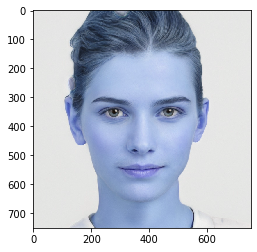

In [20]:
img = cv2.imread('images/sample_Neutral.jpg')
plt.imshow(img)

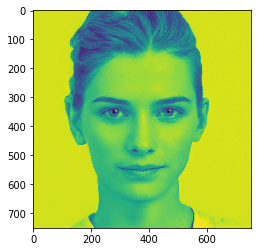

In [21]:
# Convert image to GrayScale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

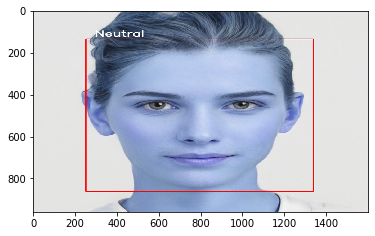

In [24]:
model.load_weights('model.h5')

# Emotions list in Dictionary
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y-50), (x+w, y+h+10), (255,0,0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    cv2.putText(img, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

result = cv2.resize(img,(1600,960),interpolation = cv2.INTER_CUBIC)
plt.imshow(result, cmap='gray')

## More Tests

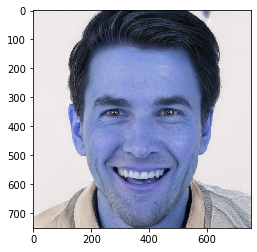

In [26]:
img = cv2.imread('images/sample_Happy.jpg')
plt.imshow(img)

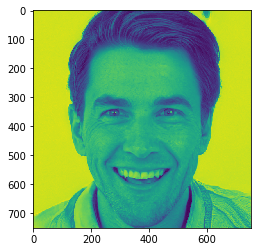

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

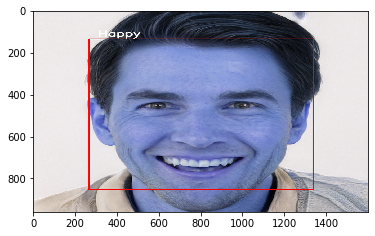

In [28]:
model.load_weights('model.h5')

# Emotions list in Dictionary
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y-50), (x+w, y+h+10), (255,0,0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    cv2.putText(img, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

result = cv2.resize(img,(1600,960),interpolation = cv2.INTER_CUBIC)
plt.imshow(result, cmap='gray')

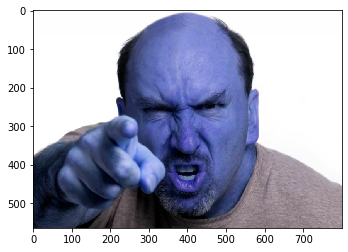

In [34]:
img = cv2.imread('images/sample_Angry.jpg')
plt.imshow(img)

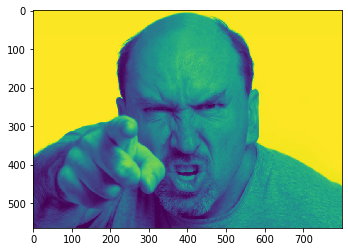

In [35]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

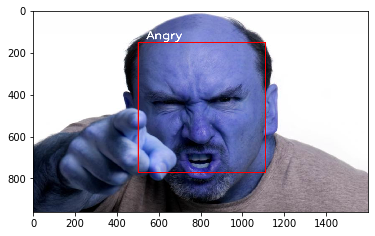

In [36]:
model.load_weights('model.h5')

# Emotions list in Dictionary
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y-50), (x+w, y+h+10), (255,0,0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    cv2.putText(img, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

result = cv2.resize(img,(1600,960),interpolation = cv2.INTER_CUBIC)
plt.imshow(result, cmap='gray')

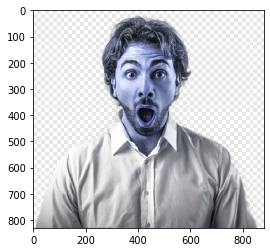

In [56]:
img = cv2.imread('images/Surprise.jpg')
plt.imshow(img)

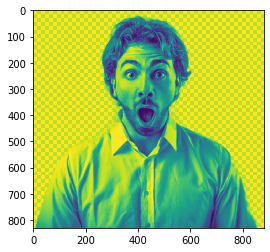

In [57]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

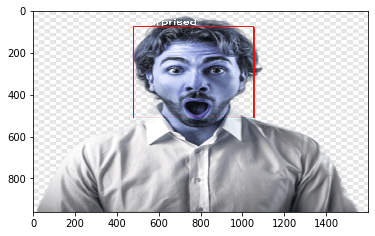

In [58]:
model.load_weights('model.h5')

# Emotions list in Dictionary
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y-50), (x+w, y+h+10), (255,0,0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    cv2.putText(img, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

result = cv2.resize(img,(1600,960),interpolation = cv2.INTER_CUBIC)
plt.imshow(result, cmap='gray')